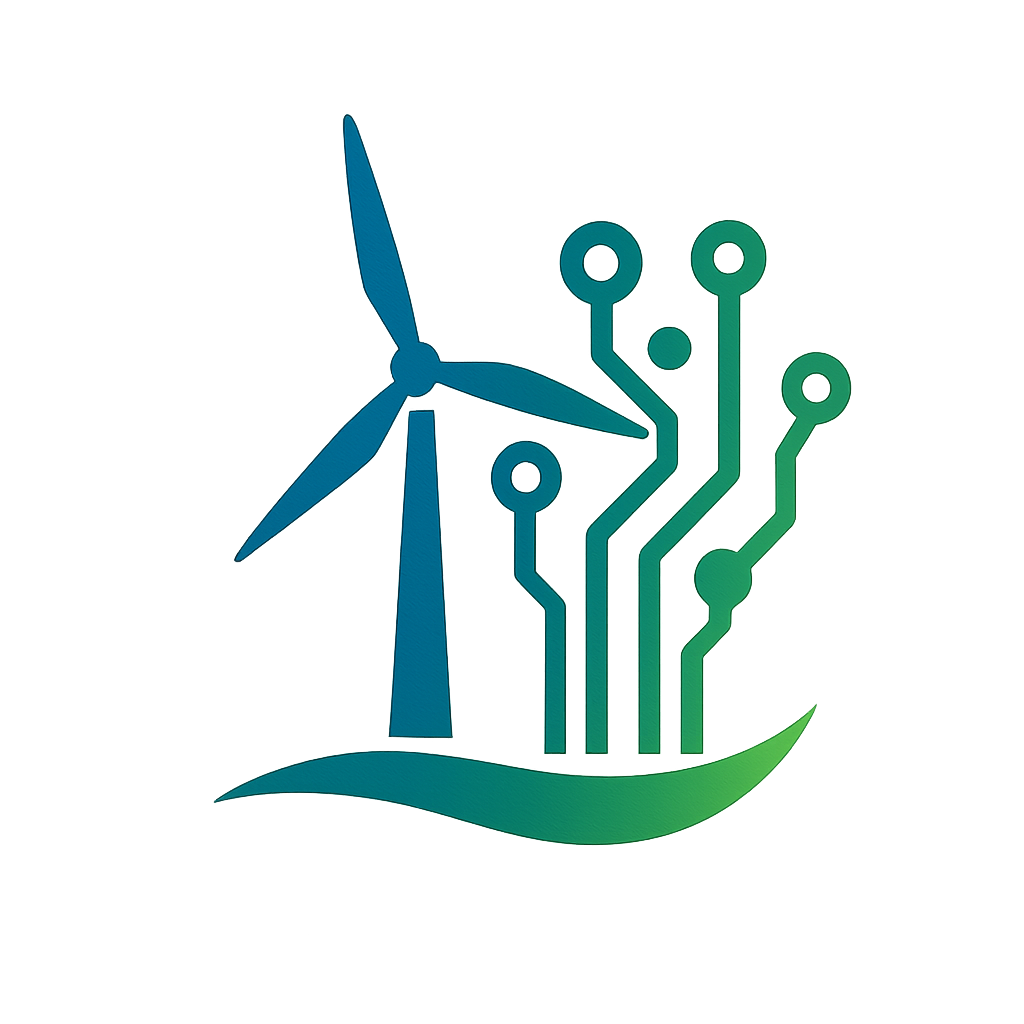

<center><font size=6>ReneWind Sentinel</font></center>

# **Problem Statement**

### Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce
the environmental impact of energy production increases.
Out of all the renewable energy alternatives, wind energy is one of the most developed technologies
worldwide. The U.S. Department of Energy has put together a guide to achieving operational efficiency using
predictive maintenance practices.
Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and
future component capability. The idea behind predictive maintenance is that failure patterns are predictable
and if component failure can be predicted accurately and the component is replaced before it fails, the costs of
operation and maintenance will be much lower.
The sensors fitted across different machines involved in the process of energy generation collect data related
to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to
various parts of the wind turbine (gearbox, tower, blades, break, etc.).

### Objective

“ReneWind” is a company working on improving the machinery/processes involved in the production of wind
energy using machine learning and has collected data on generator failure of wind turbines using sensors. They
have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of
data collected varies with companies). Data has 40 predictors, 20000 observations in the training set, and
5000 in the test set.
The objective is to build various classification models, tune them, and find the best one that will help identify
failures so that the generators can be repaired before failing/breaking to reduce the overall maintenance cost.
The nature of predictions made by the classification model will translate as follows:
True positives (TP) are failures correctly predicted by the model. These will result in repair costs.
False negatives (FN) are real failures where there is no detection by the model. These will result in
replacement costs.
False positives (FP) are detections where there is no failure. These will result in inspection costs.
It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of
inspection is less than the cost of repair.
“1” in the target variable should be considered as “failure” and “0” represents “No failure”.

### Data Dictionary

The data provided is a transformed version of the original data which was collected using sensors.

Train.csv - To be used for training and tuning of models.

Test.csv - To be used only for testing the performance of the final best model.

Both datasets consist of 40 predictor variables and 1 target variable.

# **Importing the necessary libraries**

In [1]:
# Installing the libraries with the specified version
!pip install tensorflow==2.18.0 scikit-learn==1.3.2 matplotlib===3.8.3 seaborn==0.13.2 numpy==1.26.4 pandas==2.2.2 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 76.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 61.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 59.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.3.2 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
tf-keras 2.19.0 requires tensorflow<

In [2]:
!pip install --upgrade scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 54.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.1 which is incompatible.


In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
import time

# Removes the limit for the number of displayed columns
pd.set_option('display.max_columns', None)

#for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#for model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

#for value imputation
from sklearn.impute import SimpleImputer

#For data split
from sklearn.model_selection import train_test_split

#for scaling the data
from sklearn.preprocessing import StandardScaler

#for computing the class weights
from sklearn.utils.class_weight import compute_class_weight

#for building the Neural Network models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.metrics import Recall
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Activation
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras import callbacks
from sklearn.utils import class_weight
from tensorflow.keras.callbacks import ReduceLROnPlateau


# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

import random

In [2]:
# Ensures reproducibility across NumPy, Python, and TensorFlow
keras.utils.set_random_seed(812)
tf.config.experimental.enable_op_determinism()  # Forces deterministic GPU ops for stable results


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
machine_data = pd.read_csv('/content/drive/MyDrive/AIML GL/Introduction to Neural Networks/Assignment/Train.csv')

In [5]:
#keeping a copy of the original data
train_data = machine_data.copy()

In [6]:
data_test = pd.read_csv('/content/drive/MyDrive/AIML GL/Introduction to Neural Networks/Assignment/Test.csv')

In [7]:
#keeping a copy of the test data
test_data = data_test.copy()

## Overview of the dataset

In [ ]:
#code to view the first 5 rows of train data
train_data.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -4.464606 -4.679129  3.101546  0.506130 -0.221083 -2.032511 -2.910870   
1  3.365912  3.653381  0.909671 -1.367528  0.332016  2.358938  0.732600   
2 -3.831843 -5.824444  0.634031 -2.418815 -1.773827  1.016824 -2.098941   
3  1.618098  1.888342  7.046143 -1.147285  0.083080 -1.529780  0.207309   
4 -0.111440  3.872488 -3.758361 -2.982897  3.792714  0.544960  0.205433   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.050714 -1.522351  3.761892 -5.714719  0.735893  0.981251  1.417884   
1 -4.332135  0.565695 -0.101080  1.914465 -0.951458 -1.255259 -2.706522   
2 -3.173204 -2.081860  5.392621 -0.770673  1.106718  1.144261  0.943301   
3 -2.493629  0.344926  2.118578 -3.053023  0.459719  2.704527 -0.636086   
4  4.848994 -1.854920 -6.220023  1.998347  4.723757  0.709113 -1.989432   

        V15       V16       V17       V18       V19       V20       V21  \
0 -3.375815 -3.047303  0.306194  2.914097  2.269979  4.394876 -2.388299   
1  0.193223 -4.769379 -2.205319  0.907716  0.756894 -5.833678 -3.065122   
2 -3.163804 -4.247825 -4.038909  3.688534  3.311196  1.059002 -2.143026   
3 -0.453717 -3.174046 -3.404347 -1.281536  1.582104 -1.951778 -3.516555   
4 -2.632684  4.184447  2.245356  3.734452 -6.312766 -5.379918 -0.886667   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.646388 -1.190508  3.132986  0.665277 -2.510846 -0.036744  0.726218   
1  1.596647 -1.757311  1.766444 -0.267098  3.625036  1.500346 -0.585712   
2  1.650120 -1.660592  1.679910 -0.450782 -4.550695  3.738779  1.134404   
3 -1.206011 -5.627854 -1.817653  2.124142  5.294642  4.748137 -2.308536   
4  2.061694  9.445586  4.489976 -3.945144  4.582065 -8.780422 -3.382967   

        V29       V30       V31       V32       V33        V34       V35  \
0 -3.982187 -1.072638  1.667098  3.059700 -1.690440   2.846296  2.235198   
1  0.783034 -0.201217  0.024883 -1.795474  3.032780  -2.467514  1.894599   
2 -2.033531  0.840839 -1.600395 -0.257101  0.803550   4.086219  2.292138   
3 -3.962977 -6.028730  4.948770 -3.584425 -2.577474   1.363769  0.622714   
4  5.106507  6.787513  2.044184  8.265896  6.629213 -10.068689  1.222987   

        V36       V37       V38       V39       V40  Target  
0  6.667486  0.443809 -2.369169  2.950578 -3.480324       0  
1 -2.297780 -1.731048  5.908837 -0.386345  0.616242       0  
2  5.360850  0.351993  2.940021  3.839160 -4.309402       0  
3  5.550100 -1.526796  0.138853  3.101430 -1.277378       0  
4 -3.229763  1.686909 -2.163896 -3.644622  6.510338       0

In [ ]:
#code to view the last 5 rows of train data
train_data.tail()

V1         V2        V3        V4        V5        V6        V7  \
19995 -2.071318  -1.088279 -0.796174 -3.011720 -2.287540  2.807310  0.481428   
19996  2.890264   2.483069  5.643919  0.937053 -1.380870  0.412051 -1.593386   
19997 -3.896979  -3.942407 -0.351364 -2.417462  1.107546 -1.527623 -3.519882   
19998 -3.187322 -10.051662  5.695955 -4.370053 -5.354758 -1.873044 -3.947210   
19999 -2.686903   1.961187  6.137088  2.600133  2.657241 -4.290882 -2.344267   

             V8        V9       V10       V11       V12       V13       V14  \
19995  0.105171 -0.586599 -2.899398  8.868415  1.717155  1.357838 -1.777135   
19996 -5.762498  2.150096  0.272302 -2.094760 -1.525834  0.071573 -3.540142   
19997  2.054792 -0.233996 -0.357687 -3.781972  2.180042  6.111780  1.984747   
19998  0.679420 -2.389254  5.456756  1.583029  3.571478  9.226573  2.553587   
19999  0.974004 -1.027462  0.497421 -9.589075  3.176560  1.054517 -1.415882   

            V15        V16       V17       V18       V19       V20       V21  \
19995  0.709780   4.944939 -3.100454 -1.199228 -1.084629 -0.365044  3.131175   
19996 -2.762006 -10.632206 -0.495236  1.720074  3.871596 -1.209610 -8.222073   
19997 -8.330002  -1.639184 -0.914960  5.672348 -3.924200  2.133196 -4.502031   
19998 -7.039109  -0.993573 -9.664938  1.155224  3.876895  3.523634 -7.015329   
19999 -4.668611  -5.405377  3.719759  2.892923  2.328591  1.457704 -6.428543   

            V22       V23       V24       V25       V26       V27       V28  \
19995 -3.948103 -3.578469 -8.139067 -1.936861 -1.327691 -0.402688 -1.734796   
19996  2.120866 -5.491808  1.452340  1.450002  3.684654  1.076760 -0.384175   
19997  2.777178  5.727949  1.619818 -1.699691 -0.041882 -2.923094 -2.760158   
19998 -0.132037 -3.446179 -4.801443 -0.875727 -3.811854  5.422077 -3.732322   
19999  1.818232  0.805897  7.786026  0.330857  5.257424 -4.867417 -0.818941   

            V29       V30       V31       V32       V33       V34       V35  \
19995  9.996461  6.955367 -3.938493 -8.273996  5.745013  0.589014 -0.649988   
19996 -0.838593 -0.748275 -1.088553 -4.159092  1.181466 -0.742412  5.368979   
19997 -2.253766  2.552033  0.981858  7.112162  1.476080 -3.953710  1.855555   
19998  0.608811  5.256460  1.914766  0.402812  3.163661  3.752095  8.529894   
19999 -5.667393 -2.860975  4.674280  6.620811 -1.988786 -1.348901  3.951801   

            V36       V37       V38       V39       V40  Target  
19995 -3.043174  2.216461  0.608723  0.178193  2.927755       1  
19996 -0.693028 -1.668971  3.659954  0.819863 -1.987265       0  
19997  5.029209  2.082588 -6.409304  1.477138 -0.874148       0  
19998  8.450626  0.203958 -7.129918  4.249394 -6.112267       0  
19999  5.449706 -0.455411 -2.202056  1.678229 -1.974413       0

In [ ]:
#code to view the first 5 rows of test data
test_data.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -0.613489 -3.819640  2.202302  1.300420 -1.184929 -4.495964 -1.835817   
1  0.389608 -0.512341  0.527053 -2.576776 -1.016766  2.235112 -0.441301   
2 -0.874861 -0.640632  4.084202 -1.590454  0.525855 -1.957592 -0.695367   
3  0.238384  1.458607  4.014528  2.534478  1.196987 -3.117330 -0.924035   
4  5.828225  2.768260 -1.234530  2.809264 -1.641648 -1.406698  0.568643   

         V8        V9       V10       V11       V12       V13       V14  \
0  4.722989  1.206140 -0.341909 -5.122874  1.017021  4.818549  3.269001   
1 -4.405744 -0.332869  1.966794  1.796544  0.410490  0.638328 -1.389600   
2  1.347309 -1.732348  0.466500 -4.928214  3.565070 -0.449329 -0.656246   
3  0.269493  1.322436  0.702345 -5.578345 -0.850662  2.590525  0.767418   
4  0.965043  1.918379 -2.774855 -0.530016  1.374544 -0.650941 -1.679466   

        V15       V16       V17       V18       V19       V20       V21  \
0 -2.984330  1.387370  2.032002 -0.511587 -1.023069  7.338733 -2.242244   
1 -1.883410 -5.017922 -3.827238  2.418060  1.762285 -3.242297 -3.192960   
2 -0.166537 -1.630207  2.291865  2.396492  0.601278  1.793534 -2.120238   
3 -2.390809 -2.341961  0.571875 -0.933751  0.508677  1.210715 -3.259524   
4 -0.379220 -4.443143  3.893857 -0.607640  2.944931  0.367233 -5.789081   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.155489  2.053786 -2.772273  1.851369 -1.788696 -0.277282 -1.255143   
1  1.857454 -1.707954  0.633444 -0.587898  0.083683  3.013935 -0.182309   
2  0.481968 -0.840707  1.790197  1.874395  0.363930 -0.169063 -0.483832   
3  0.104587 -0.658875  1.498107  1.100305  4.142988 -0.248446 -1.136516   
4  4.597528  4.450264  3.224941  0.396701  0.247765 -2.362047  1.079378   

        V29       V30       V31       V32       V33       V34       V35  \
0 -3.832886 -1.504542  1.586765  2.291204 -5.411388  0.870073  0.574479   
1  0.223917  0.865228 -1.782158 -2.474936  2.493582  0.315165  2.059288   
2 -2.118982 -2.156586  2.907291 -1.318888 -2.997464  0.459664  0.619774   
3 -5.355810 -4.545931  3.808667  3.517918 -3.074085 -0.284220  0.954576   
4 -0.473076  2.242810 -3.591421  1.773841 -1.501573 -2.226702  4.776830   

        V36       V37        V38       V39       V40  Target  
0  4.157191  1.428093 -10.511342  0.454664 -1.448363       0  
1  0.683859 -0.485452   5.128350  1.720744 -1.488235       0  
2  5.631504  1.323512  -1.752154  1.808302  1.675748       0  
3  3.029331 -1.367198  -3.412140  0.906000 -2.450889       0  
4 -6.559698 -0.805551  -0.276007 -3.858207 -0.537694       0

In [ ]:
#code to view the last 5 rows of test data
test_data.tail()

V1        V2        V3        V4        V5        V6        V7  \
4995 -5.120451  1.634804  1.251259  4.035944  3.291204 -2.932230 -1.328662   
4996 -5.172498  1.171653  1.579105  1.219922  2.529627 -0.668648 -2.618321   
4997 -1.114136 -0.403576 -1.764875 -5.879475  3.571558  3.710802 -2.482952   
4998 -1.703241  0.614650  6.220503 -0.104132  0.955916 -3.278706 -1.633855   
4999 -0.603701  0.959550 -0.720995  8.229574 -1.815610 -2.275547 -2.574524   

            V8        V9       V10       V11       V12       V13       V14  \
4995  1.754066 -2.984586  1.248633 -6.877747  3.715160 -2.511806 -1.394968   
4996 -2.000545  0.633791 -0.578938 -3.671247  0.460184  3.320582 -1.074959   
4997 -0.307614 -0.921945 -2.999141 -0.111655 -1.976921 -1.622992 -0.945453   
4998 -0.103936  1.388152 -1.065622 -7.969807  2.262126  3.134010 -0.485755   
4999 -1.041479  4.129645 -2.731288 -3.292371 -1.673752  0.464506 -1.645933   

           V15       V16       V17       V18       V19       V20       V21  \
4995 -2.554137 -2.197372  4.771707  2.402944  3.791758  0.486773 -2.028078   
4996 -7.112535 -4.355946 -0.001086  3.698440 -0.846390 -0.222274 -3.644960   
4997 -2.735095 -0.813009  0.609751  8.148839 -9.199173 -3.872479 -0.295705   
4998 -3.498287 -4.561709  3.135784  2.536404 -0.792224  4.398442 -4.073022   
4999 -5.263407 -7.987625  6.480488  0.226333  4.963336  6.752006 -6.305771   

           V22       V23        V24       V25       V26       V27       V28  \
4995  1.777923  3.667993  11.374878 -1.977092  2.251588 -7.318514  1.906959   
4996  0.736036  0.925657   3.277684 -2.276759  4.457628 -4.542885 -1.348010   
4997  1.468382  2.884317   2.792106 -1.135704  1.197920 -4.341677 -2.869396   
4998 -0.037573 -2.371253  -1.541981  2.907892  3.214506 -0.168668 -1.541327   
4999  3.270541  1.897225   3.270810 -0.637079 -0.924996 -6.758918  2.990181   

           V29       V30       V31       V32       V33        V34       V35  \
4995 -3.733697 -0.012451  2.120487  9.979118  0.063438   0.217281  3.036388   
4996 -1.779429  0.352203 -0.214294  4.423900  2.603811  -2.152170  0.917401   
4997  4.124074  4.196731  3.470723  3.791778  7.481506 -10.061396 -0.387166   
4998 -4.724387 -5.525040  1.667974 -4.100352 -5.949325   0.550372 -1.573640   
4999 -0.813841  3.498989 -8.434720  2.369776 -1.062408   0.790772  4.951955   

           V36       V37       V38       V39       V40  Target  
4995  2.109323 -0.557433  1.938718  0.512674 -2.694194       0  
4996  2.156586  0.466963  0.470120  2.196756 -2.376515       0  
4997  1.848509  1.818248 -1.245633 -1.260876  7.474682       0  
4998  6.823936  2.139307 -4.036164  3.436051  0.579249       0  
4999 -7.440825 -0.069506 -0.918083 -2.291154 -5.362891       0

### Understand the shape of the dataset.

In [ ]:
print(train_data.shape)
print("Rows : ",train_data.shape[0])
print("Columns : ", train_data.shape[1])

(20000, 41)
Rows :  20000
Columns :  41


* There are 20000 observations and 41 columns in the training dataset

In [ ]:
print(test_data.shape)
print("Rows : ",test_data.shape[0])
print("Columns : ", test_data.shape[1])

(5000, 41)
Rows :  5000
Columns :  41


* There are 5000 rows and 41 columns in the test dataset

### Check the data types of the columns for the dataset.

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

**Observations-**
* There are 41 features in the dataset and all of them are numeric types.
* There are 18 missing values each in both the V1 and V2 columns in the data.

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      4995 non-null   float64
 1   V2      4994 non-null   float64
 2   V3      5000 non-null   float64
 3   V4      5000 non-null   float64
 4   V5      5000 non-null   float64
 5   V6      5000 non-null   float64
 6   V7      5000 non-null   float64
 7   V8      5000 non-null   float64
 8   V9      5000 non-null   float64
 9   V10     5000 non-null   float64
 10  V11     5000 non-null   float64
 11  V12     5000 non-null   float64
 12  V13     5000 non-null   float64
 13  V14     5000 non-null   float64
 14  V15     5000 non-null   float64
 15  V16     5000 non-null   float64
 16  V17     5000 non-null   float64
 17  V18     5000 non-null   float64
 18  V19     5000 non-null   float64
 19  V20     5000 non-null   float64
 20  V21     5000 non-null   float64
 21  V22     5000 non-null   float64
 22  

**Observations-**
* There are 41 features in the dataset and all of them are numeric types.
* There are 11 missing values each in both the V1 and V2 columns in the data.

### Summary of the dataset.

In [ ]:
train_data.describe().T

count      mean       std        min       25%       50%       75%  \
V1      19982.0 -0.271996  3.441625 -11.876451 -2.737146 -0.747917  1.840112   
V2      19982.0  0.440430  3.150784 -12.319951 -1.640674  0.471536  2.543967   
V3      20000.0  2.484699  3.388963 -10.708139  0.206860  2.255786  4.566165   
V4      20000.0 -0.083152  3.431595 -15.082052 -2.347660 -0.135241  2.130615   
V5      20000.0 -0.053752  2.104801  -8.603361 -1.535607 -0.101952  1.340480   
V6      20000.0 -0.995443  2.040970 -10.227147 -2.347238 -1.000515  0.380330   
V7      20000.0 -0.879325  1.761626  -7.949681 -2.030926 -0.917179  0.223695   
V8      20000.0 -0.548195  3.295756 -15.657561 -2.642665 -0.389085  1.722965   
V9      20000.0 -0.016808  2.160568  -8.596313 -1.494973 -0.067597  1.409203   
V10     20000.0 -0.012998  2.193201  -9.853957 -1.411212  0.100973  1.477045   
V11     20000.0 -1.895393  3.124322 -14.832058 -3.922404 -1.921237  0.118906   
V12     20000.0  1.604825  2.930454 -12.948007 -0.396514  1.507841  3.571454   
V13     20000.0  1.580486  2.874658 -13.228247 -0.223545  1.637185  3.459886   
V14     20000.0 -0.950632  1.789651  -7.738593 -2.170741 -0.957163  0.270677   
V15     20000.0 -2.414993  3.354974 -16.416606 -4.415322 -2.382617 -0.359052   
V16     20000.0 -2.925225  4.221717 -20.374158 -5.634240 -2.682705 -0.095046   
V17     20000.0 -0.134261  3.345462 -14.091184 -2.215611 -0.014580  2.068751   
V18     20000.0  1.189347  2.592276 -11.643994 -0.403917  0.883398  2.571770   
V19     20000.0  1.181808  3.396925 -13.491784 -1.050168  1.279061  3.493299   
V20     20000.0  0.023608  3.669477 -13.922659 -2.432953  0.033415  2.512372   
V21     20000.0 -3.611252  3.567690 -17.956231 -5.930360 -3.532888 -1.265884   
V22     20000.0  0.951835  1.651547 -10.122095 -0.118127  0.974687  2.025594   
V23     20000.0 -0.366116  4.031860 -14.866128 -3.098756 -0.262093  2.451750   
V24     20000.0  1.134389  3.912069 -16.387147 -1.468062  0.969048  3.545975   
V25     20000.0 -0.002186  2.016740  -8.228266 -1.365178  0.025050  1.397112   
V26     20000.0  1.873785  3.435137 -11.834271 -0.337863  1.950531  4.130037   
V27     20000.0 -0.612413  4.368847 -14.904939 -3.652323 -0.884894  2.189177   
V28     20000.0 -0.883218  1.917713  -9.269489 -2.171218 -0.891073  0.375884   
V29     20000.0 -0.985625  2.684365 -12.579469 -2.787443 -1.176181  0.629773   
V30     20000.0 -0.015534  3.005258 -14.796047 -1.867114  0.184346  2.036229   
V31     20000.0  0.486842  3.461384 -13.722760 -1.817772  0.490304  2.730688   
V32     20000.0  0.303799  5.500400 -19.876502 -3.420469  0.052073  3.761722   
V33     20000.0  0.049825  3.575285 -16.898353 -2.242857 -0.066249  2.255134   
V34     20000.0 -0.462702  3.183841 -17.985094 -2.136984 -0.255008  1.436935   
V35     20000.0  2.229620  2.937102 -15.349803  0.336191  2.098633  4.064358   
V36     20000.0  1.514809  3.800860 -14.833178 -0.943809  1.566526  3.983939   
V37     20000.0  0.011316  1.788165  -5.478350 -1.255819 -0.128435  1.175533   
V38     20000.0 -0.344025  3.948147 -17.375002 -2.987638 -0.316849  2.279399   
V39     20000.0  0.890653  1.753054  -6.438880 -0.272250  0.919261  2.057540   
V40     20000.0 -0.875630  3.012155 -11.023935 -2.940193 -0.920806  1.119897   
Target  20000.0  0.055500  0.228959   0.000000  0.000000  0.000000  0.000000   

              max  
V1      15.493002  
V2      13.089269  
V3      17.090919  
V4      13.236381  
V5       8.133797  
V6       6.975847  
V7       8.006091  
V8      11.679495  
V9       8.137580  
V10      8.108472  
V11     11.826433  
V12     15.080698  
V13     15.419616  
V14      5.670664  
V15     12.246455  
V16     13.583212  
V17     16.756432  
V18     13.179863  
V19     13.237742  
V20     16.052339  
V21     13.840473  
V22      7.409856  
V23     14.458734  
V24     17.163291  
V25      8.223389  
V26     16.836410  
V27     17.560404  
V28      6.527643  
V29     10.722055  
V30     12.505812  
V31     17.255090  
V32     2

**Observations-**
* The minimum of target variable is 0 and maximum is 1 as expected.
* The minimum, maximum and standard deviation of other features does not indicate much as we are not aware what those feature values belong to.

In [ ]:
train_data.describe().T[["mean", "std", "min", "max"]]

mean       std        min        max
V1     -0.271996  3.441625 -11.876451  15.493002
V2      0.440430  3.150784 -12.319951  13.089269
V3      2.484699  3.388963 -10.708139  17.090919
V4     -0.083152  3.431595 -15.082052  13.236381
V5     -0.053752  2.104801  -8.603361   8.133797
V6     -0.995443  2.040970 -10.227147   6.975847
V7     -0.879325  1.761626  -7.949681   8.006091
V8     -0.548195  3.295756 -15.657561  11.679495
V9     -0.016808  2.160568  -8.596313   8.137580
V10    -0.012998  2.193201  -9.853957   8.108472
V11    -1.895393  3.124322 -14.832058  11.826433
V12     1.604825  2.930454 -12.948007  15.080698
V13     1.580486  2.874658 -13.228247  15.419616
V14    -0.950632  1.789651  -7.738593   5.670664
V15    -2.414993  3.354974 -16.416606  12.246455
V16    -2.925225  4.221717 -20.374158  13.583212
V17    -0.134261  3.345462 -14.091184  16.756432
V18     1.189347  2.592276 -11.643994  13.179863
V19     1.181808  3.396925 -13.491784  13.237742
V20     0.023608  3.669477 -13.922659  16.052339
V21    -3.611252  3.567690 -17.956231  13.840473
V22     0.951835  1.651547 -10.122095   7.409856
V23    -0.366116  4.031860 -14.866128  14.458734
V24     1.134389  3.912069 -16.387147  17.163291
V25    -0.002186  2.016740  -8.228266   8.223389
V26     1.873785  3.435137 -11.834271  16.836410
V27    -0.612413  4.368847 -14.904939  17.560404
V28    -0.883218  1.917713  -9.269489   6.527643
V29    -0.985625  2.684365 -12.579469  10.722055
V30    -0.015534  3.005258 -14.796047  12.505812
V31     0.486842  3.461384 -13.722760  17.255090
V32     0.303799  5.500400 -19.876502  23.633187
V33     0.049825  3.575285 -16.898353  16.692486
V34    -0.462702  3.183841 -17.985094  14.358213
V35     2.229620  2.937102 -15.349803  15.291065
V36     1.514809  3.800860 -14.833178  19.329576
V37     0.011316  1.788165  -5.478350   7.467006
V38    -0.344025  3.948147 -17.375002  15.289923
V39     0.890653  1.753054  -6.438880   7.759877
V40    -0.875630  3.012155 -11.023935  10.654265
Target  0.055500  0.228959   0.000000   1.000000

Observations :

Range variation - Here we can see that the data is having large scale variation range.

* V1 feature has minimum as -11.87 and maximum value of 15.49
* V13 feature also has minimum as -13.22 and maximum value of 15.41
* V32 feature has minimum as -19.87 and maximum value of 23.63 and standard deviation of 5.5

This wide range of variation in the data hints that we should definitely perform 'Feature Scaling', either Standardization or Normalization, before we feed this data to out Neural Network. As we are aware that Neural Networks are sensitive to wide variation of data, therefore this is an important step to be done.

### Checking for duplicates

In [ ]:
# Check how many duplicate rows are present
duplicate_rows = train_data[train_data.duplicated()]
print(f"Number of duplicate rows present : {duplicate_rows.shape[0]}")

Number of duplicate rows present : 0


## Exploratory Data Analysis

<Axes: xlabel='Target'>

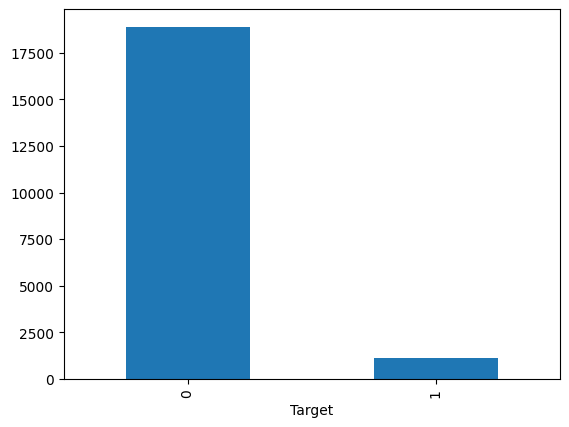

In [ ]:
#visual representation of instances per class
train_data.Target.value_counts().plot.bar()

* Observation -


The bar plot visually confirms the severe class imbalance in the dataset. The class representing 'No Failure' (0) has a significantly higher number of instances compared to the 'Failure' (1) class. This imbalance highlights the challenge of building a model that can effectively predict the minority class (failure). In future steps, we have to consider techniques to address this imbalance, such as oversampling the minority class or using appropriate evaluation metrics that are not biased by class distribution.

##Function to perform EDA

###Univariate Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots( #Creates a figure with 2 subplots stacked vertically (boxplot on top, histogram below).
        nrows=2,  # Two rows (for boxplot and histogram).
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},   #. Allocates 25% height to boxplot, 75% to histogram.
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  #Total number of entries(row) in the column
    count = data[feature].nunique()  #Total number of unique values in the column
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

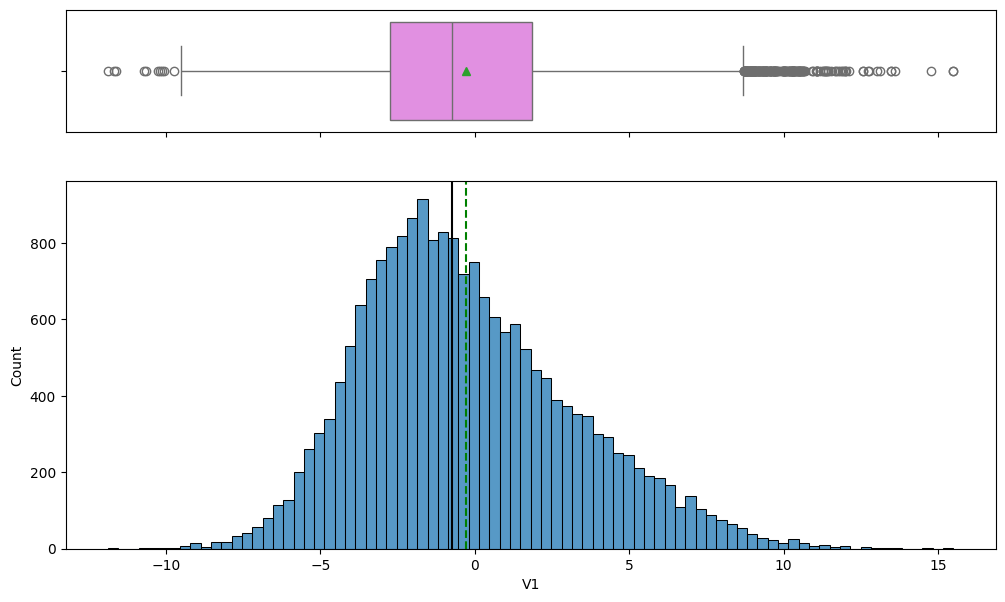

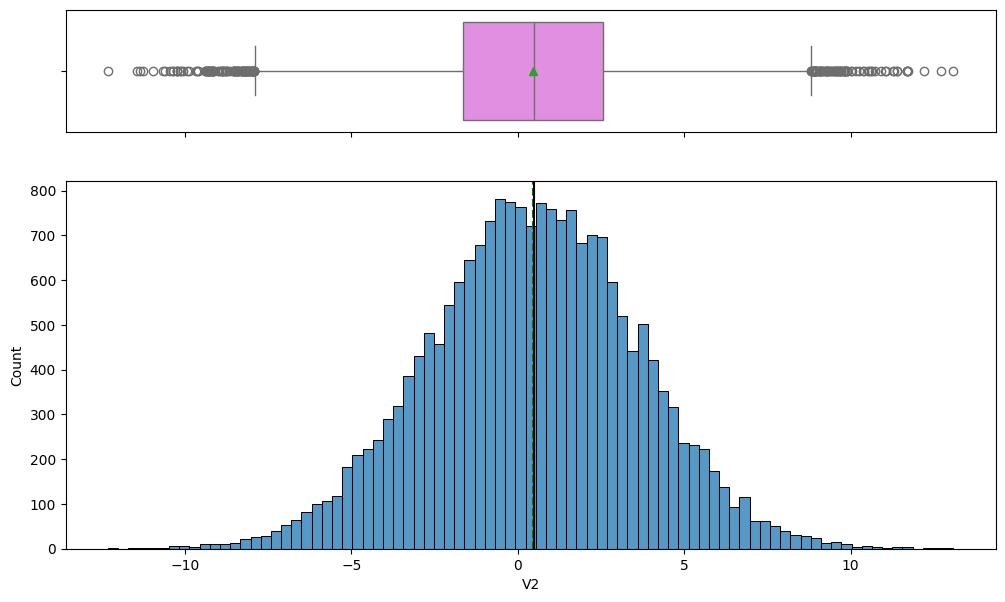

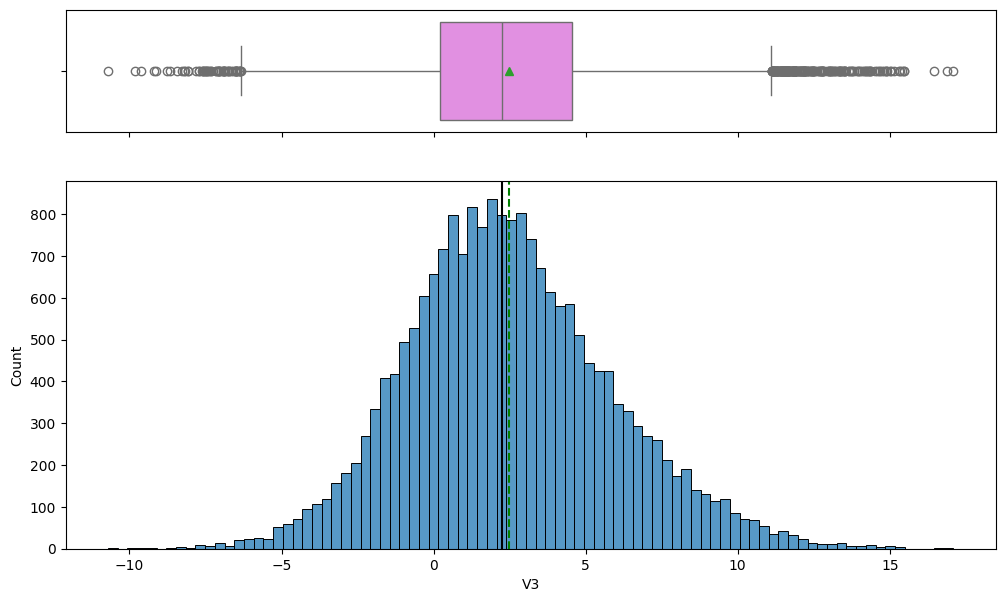

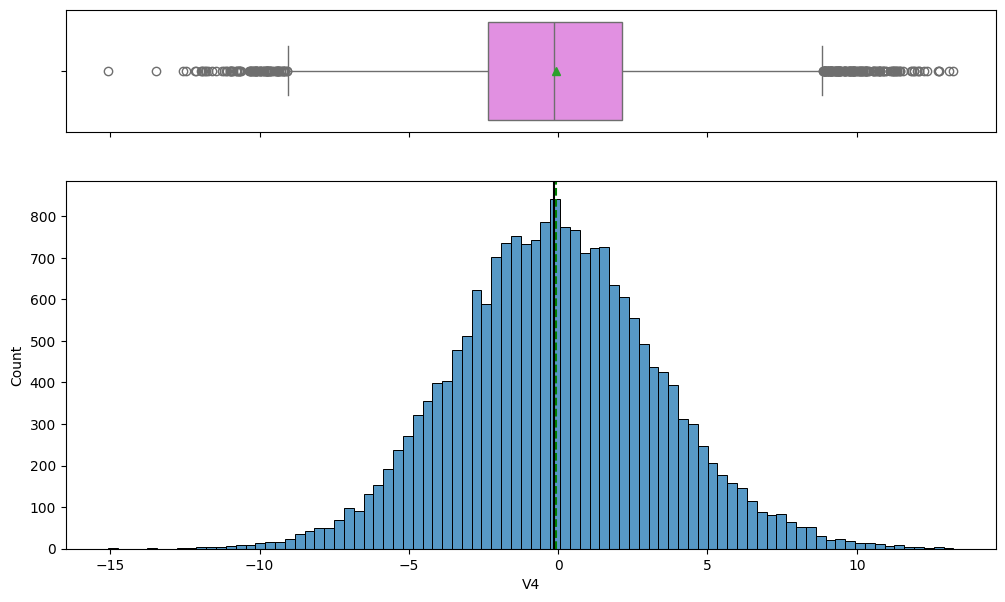

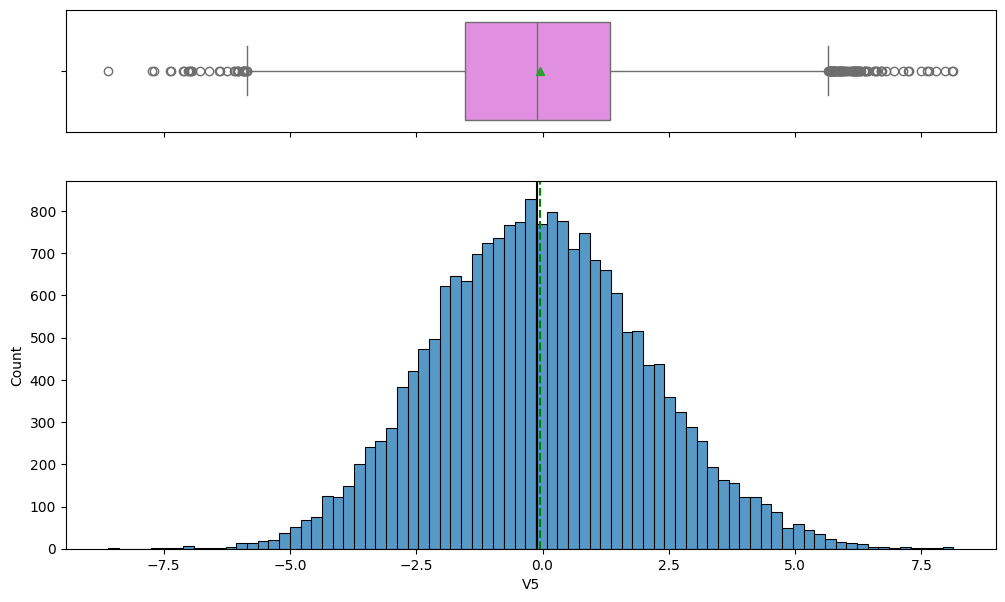

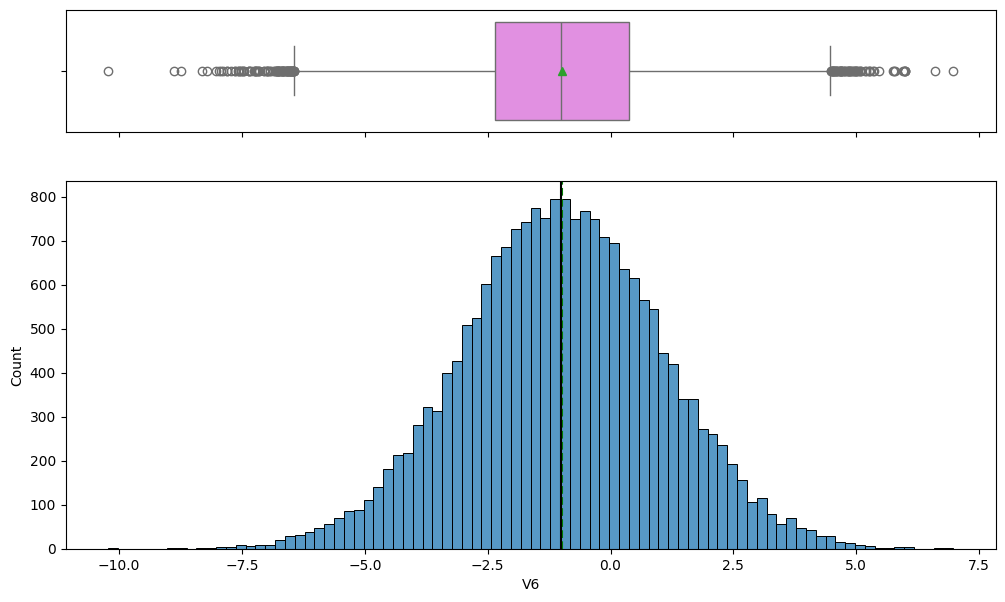

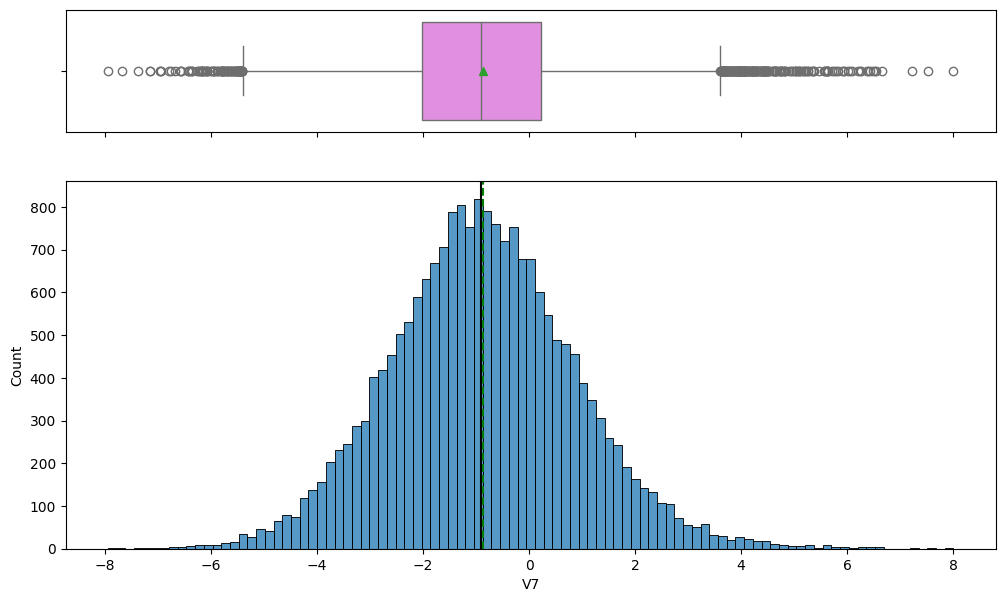

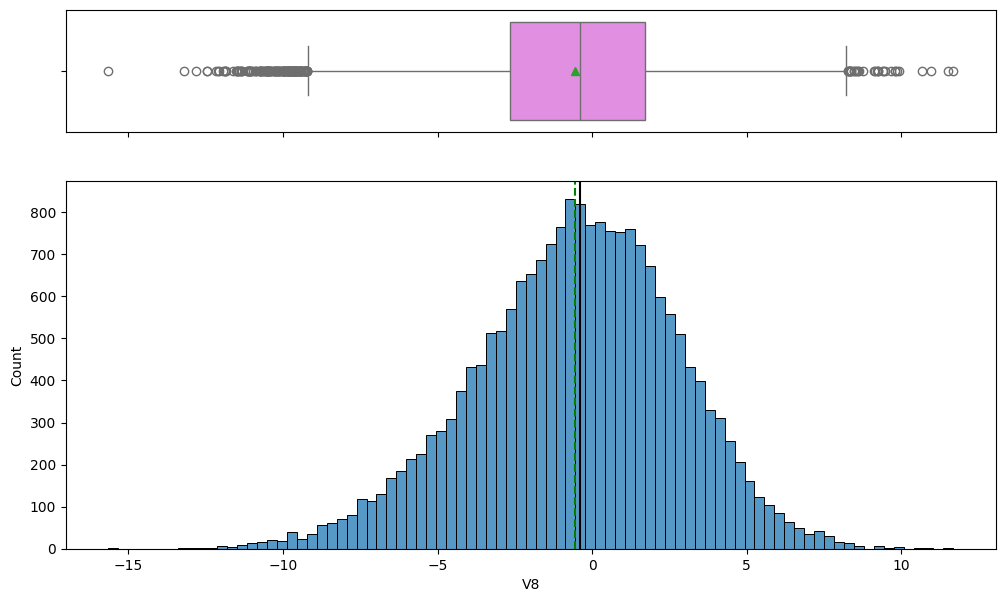

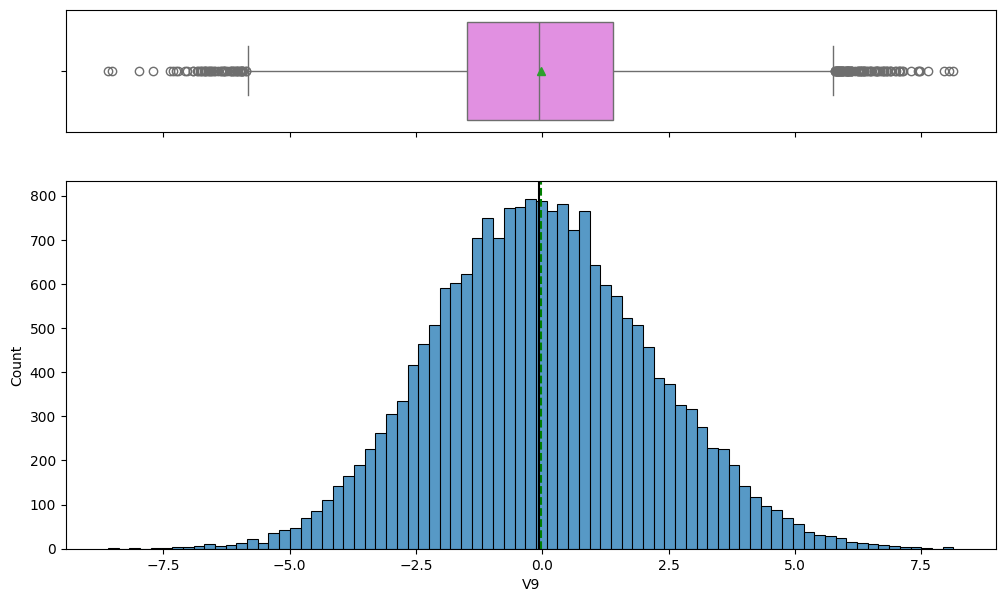

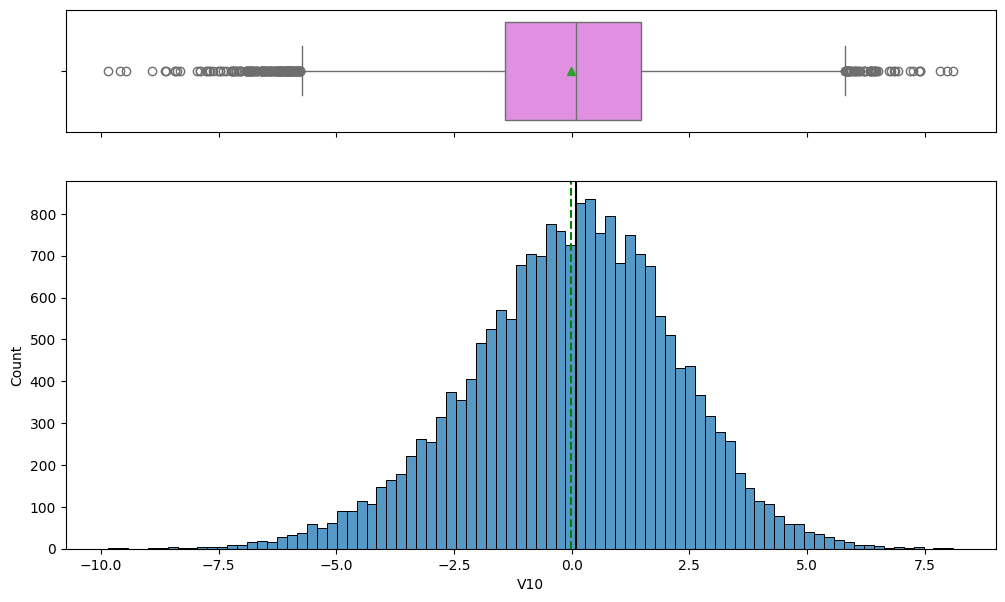

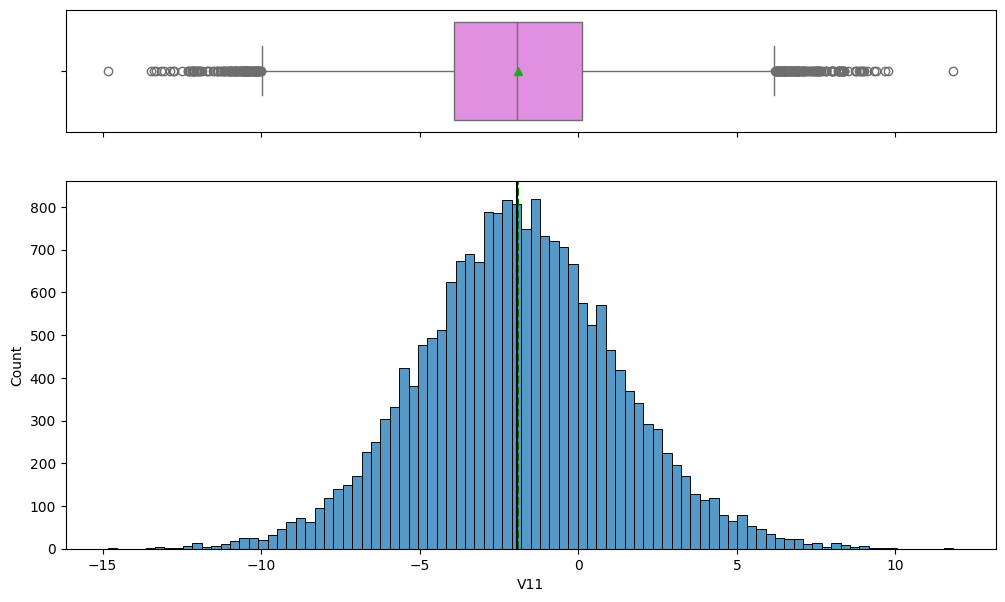

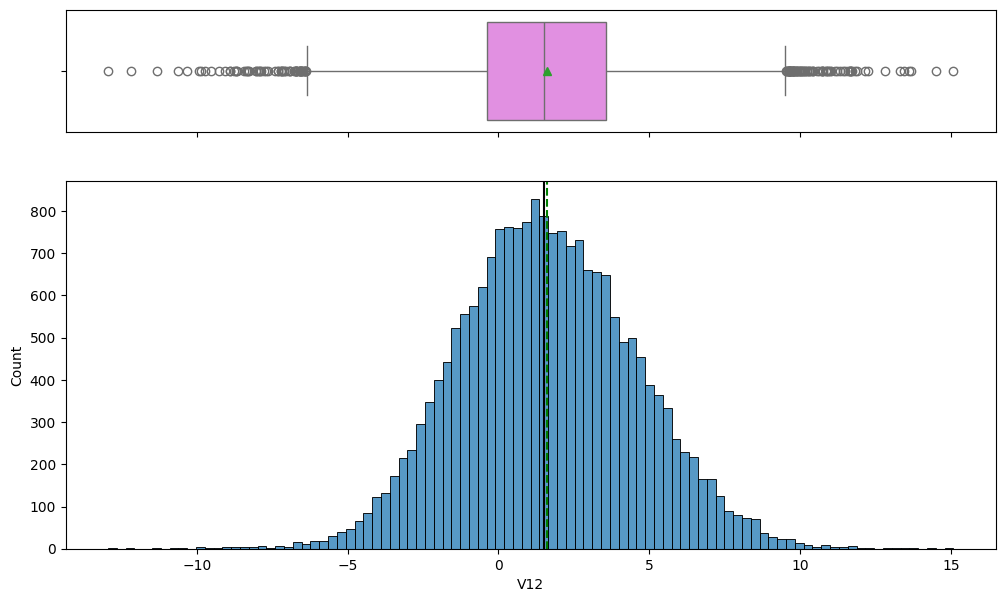

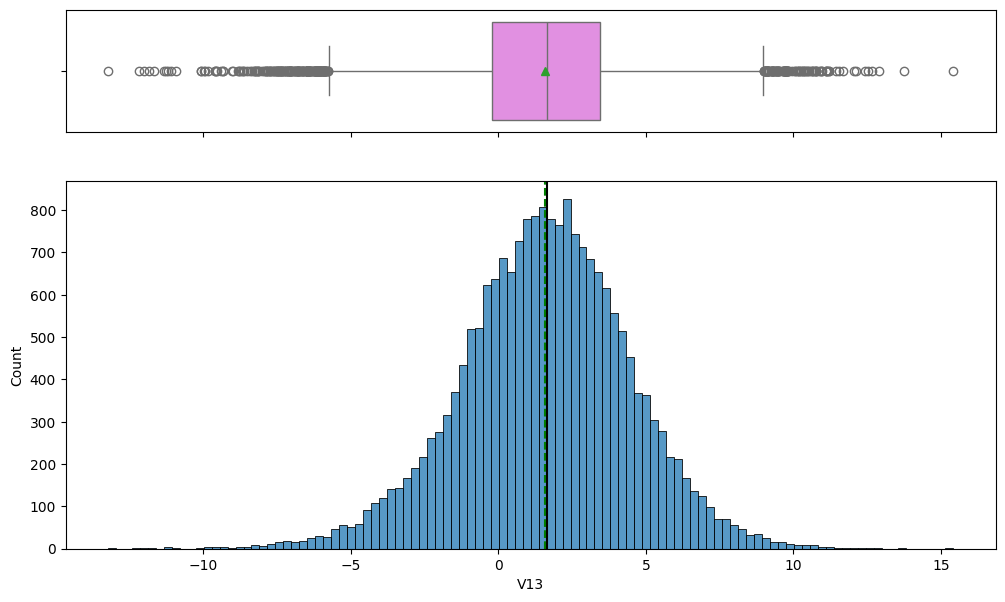

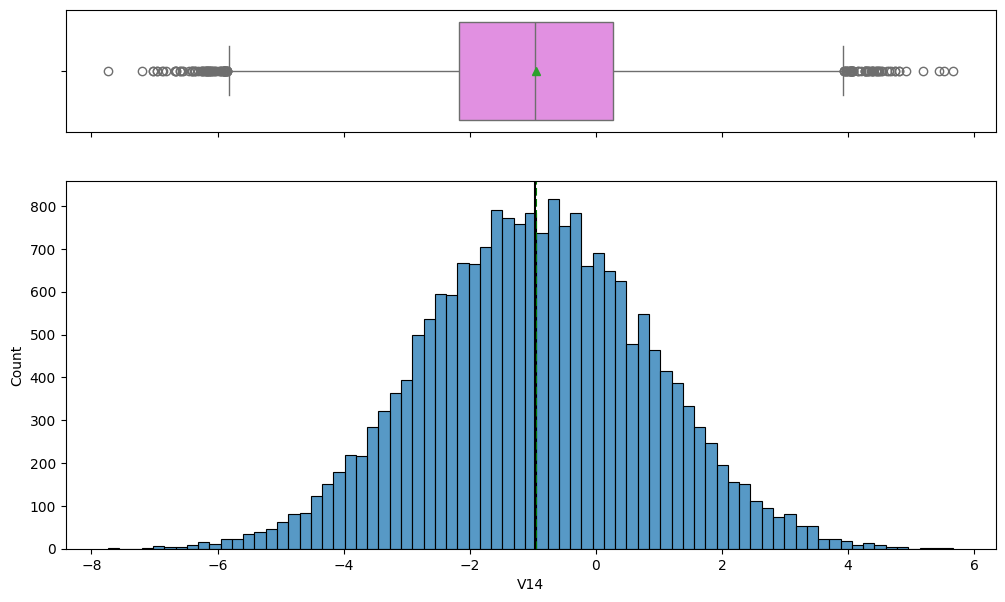

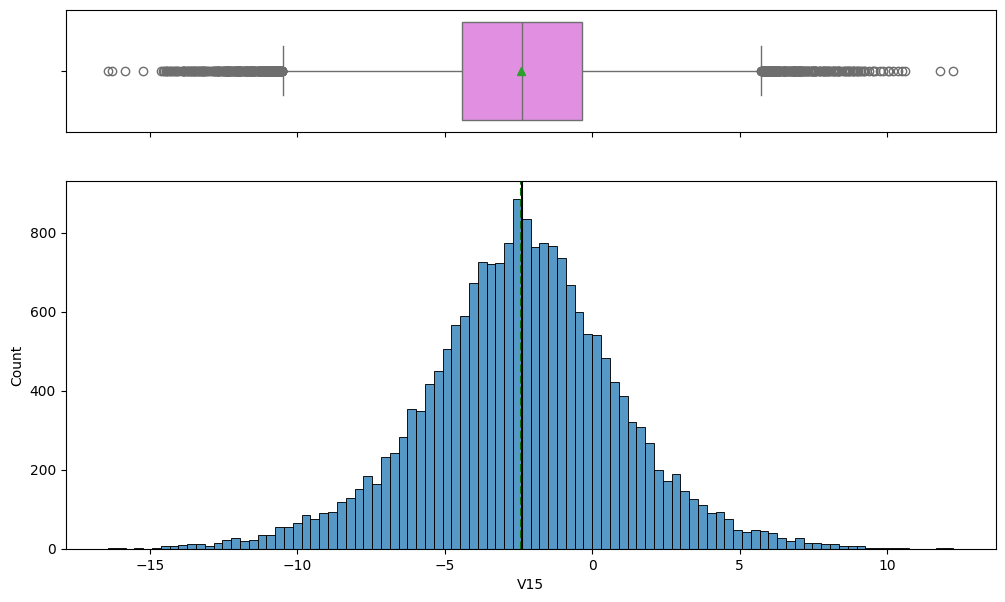

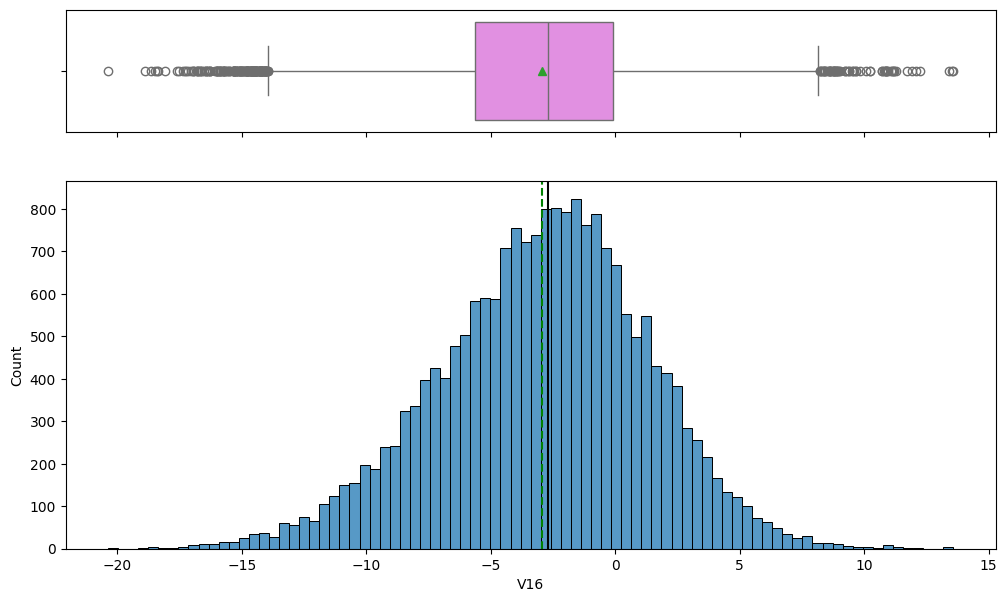

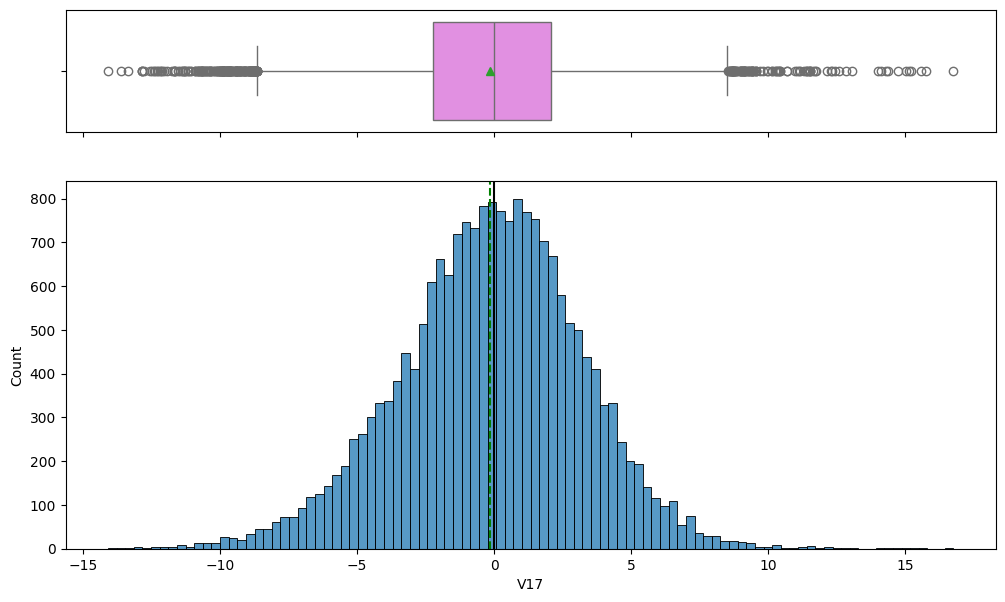

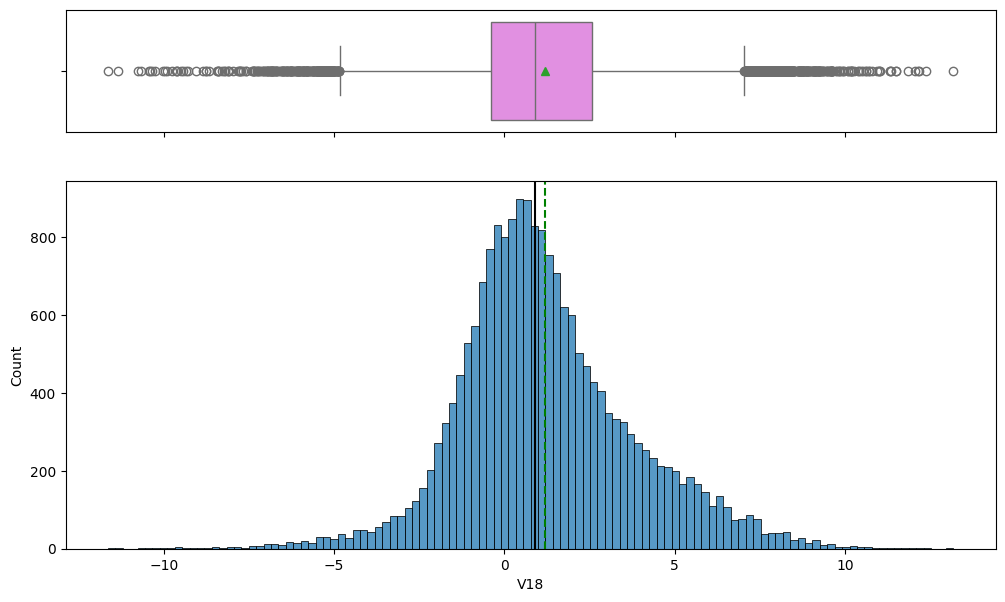

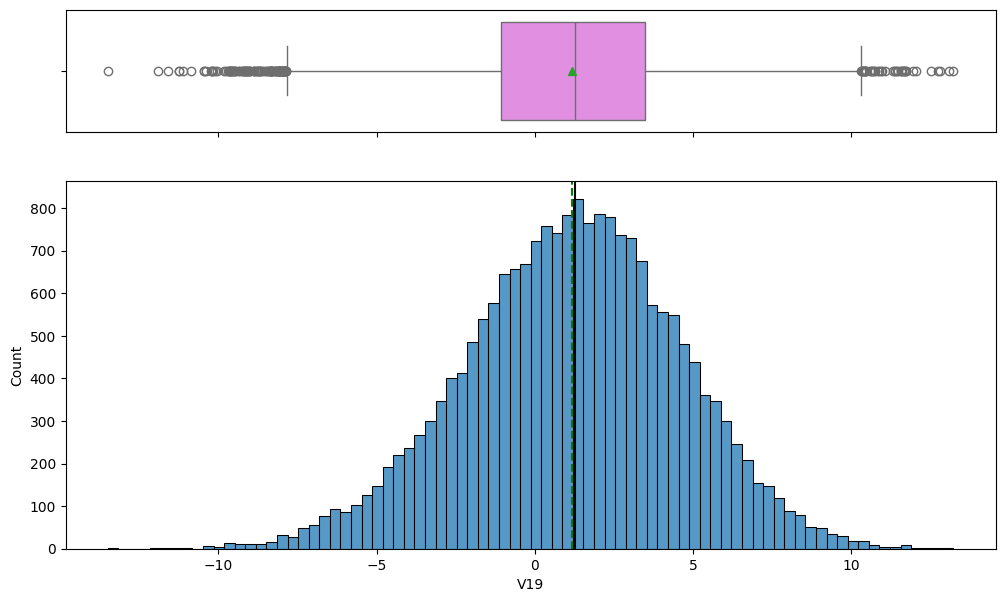

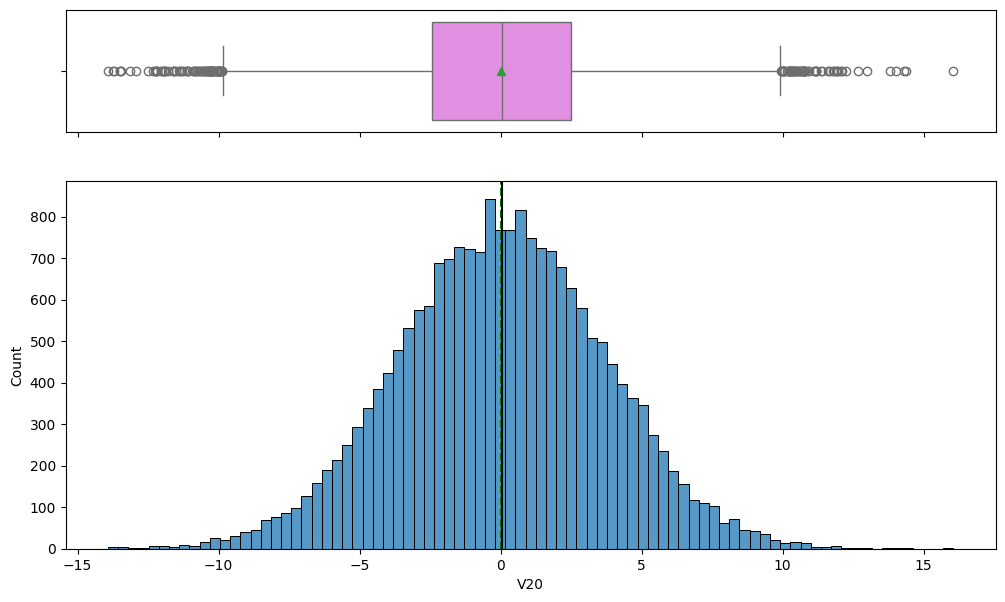

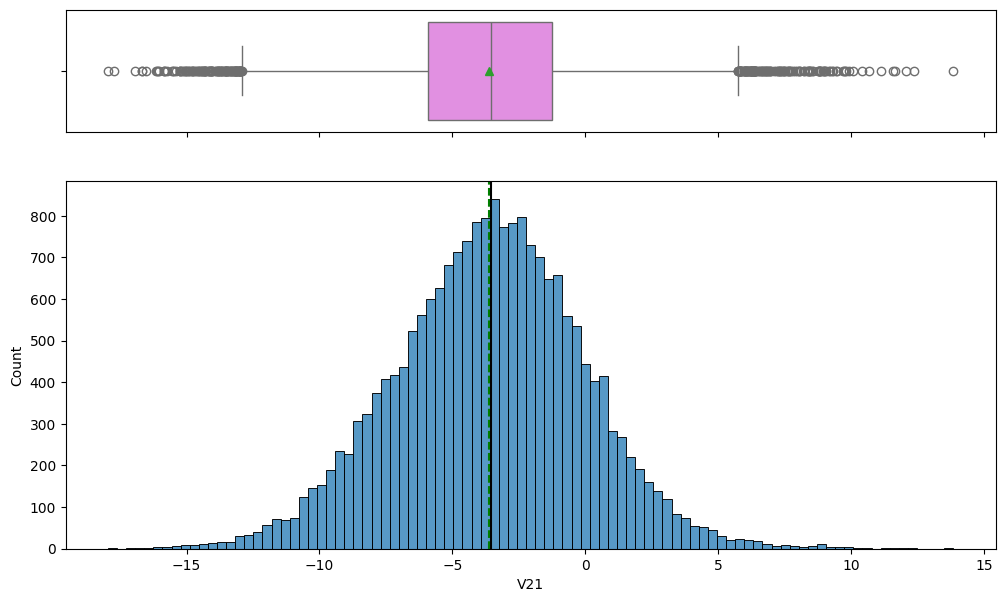

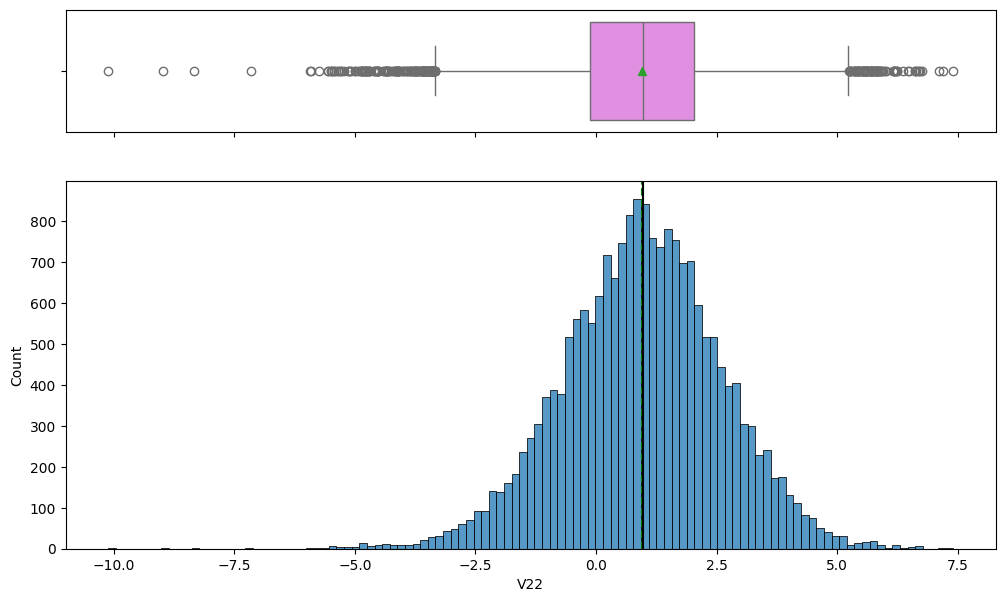

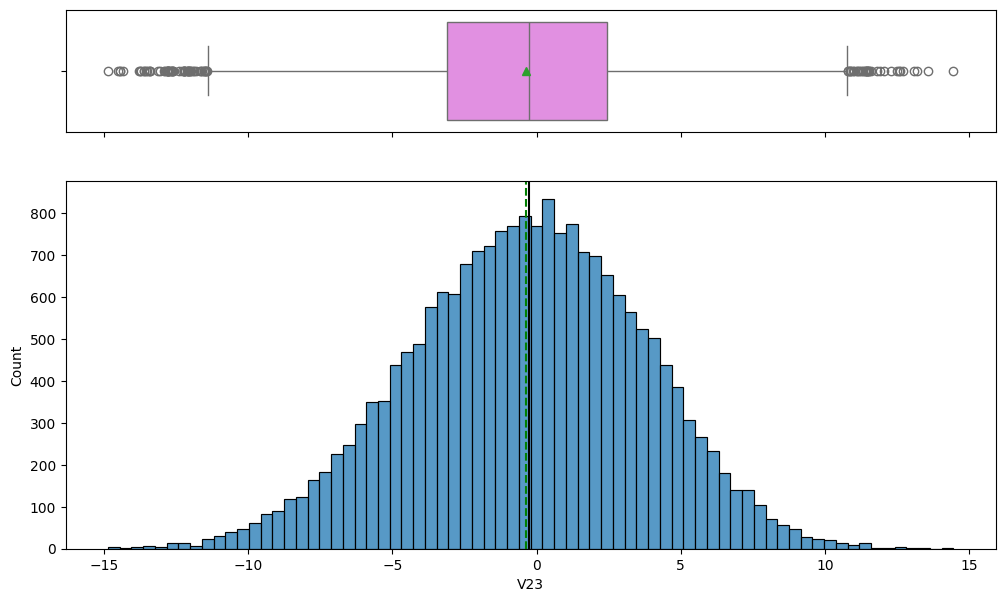

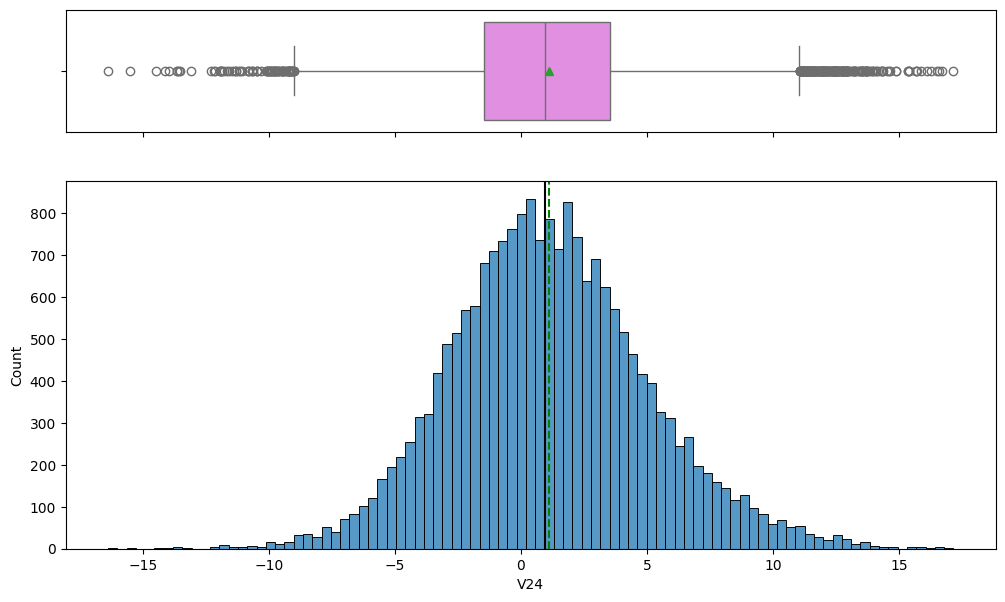

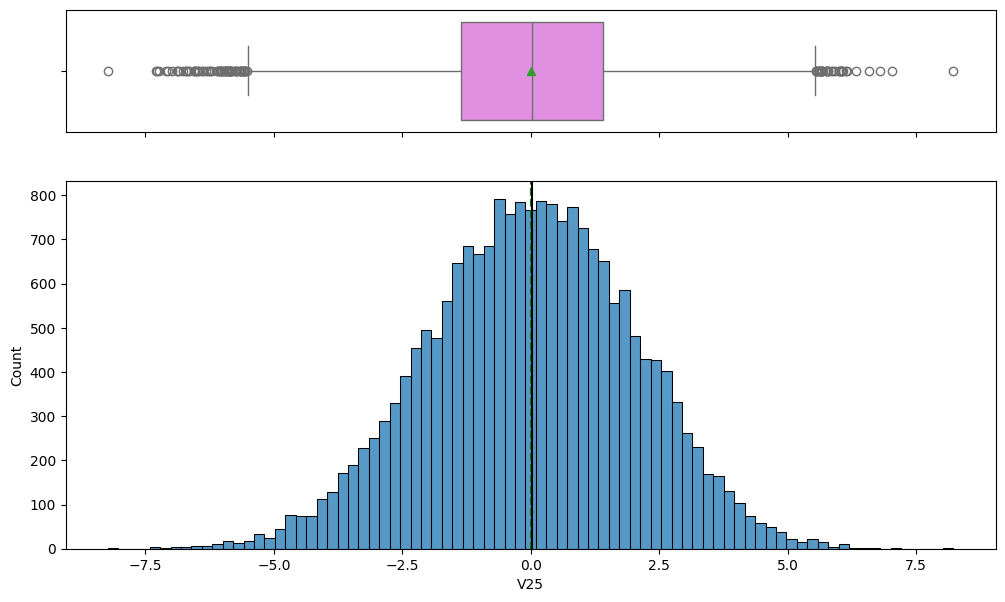

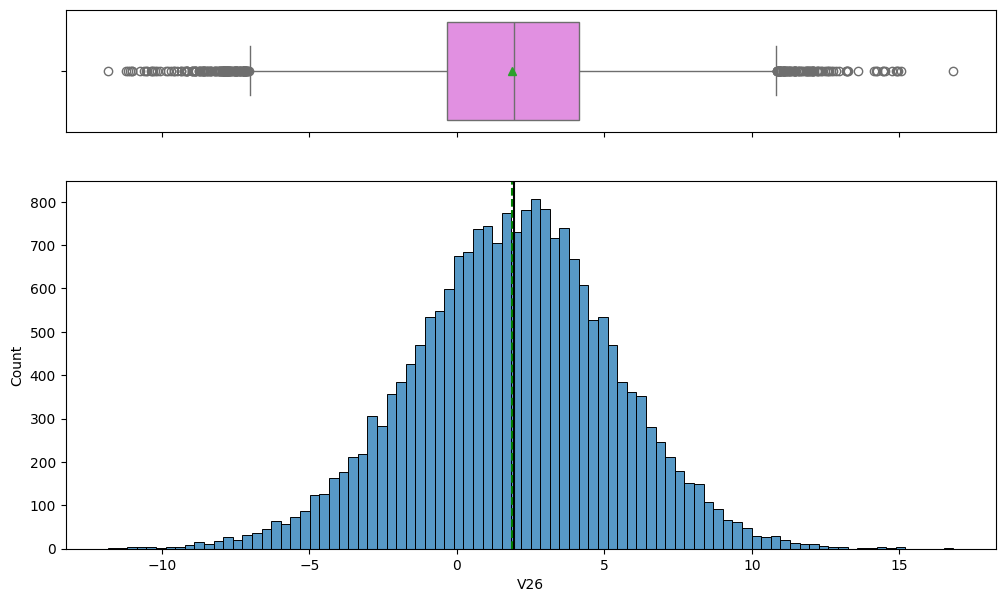

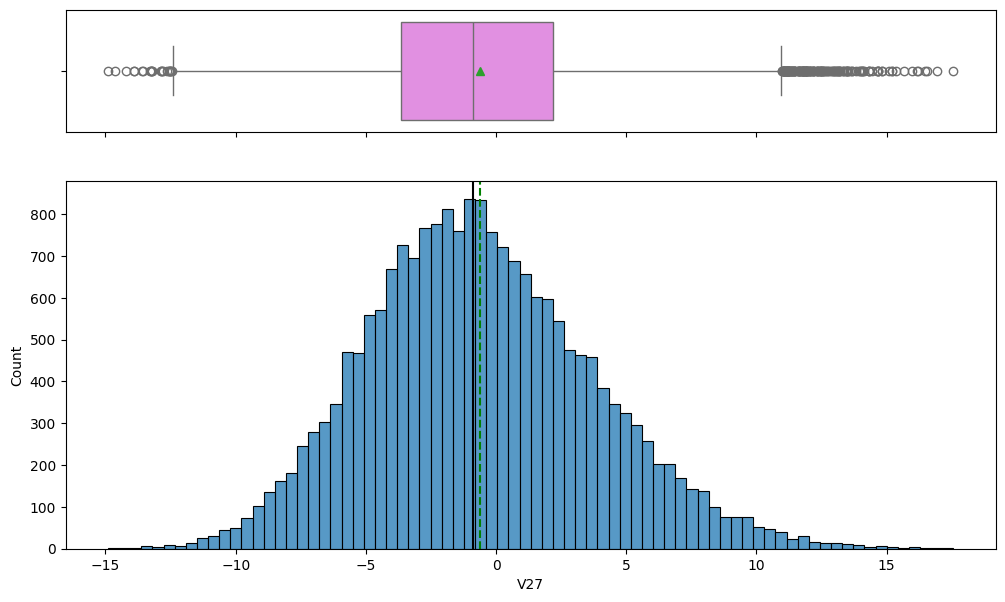

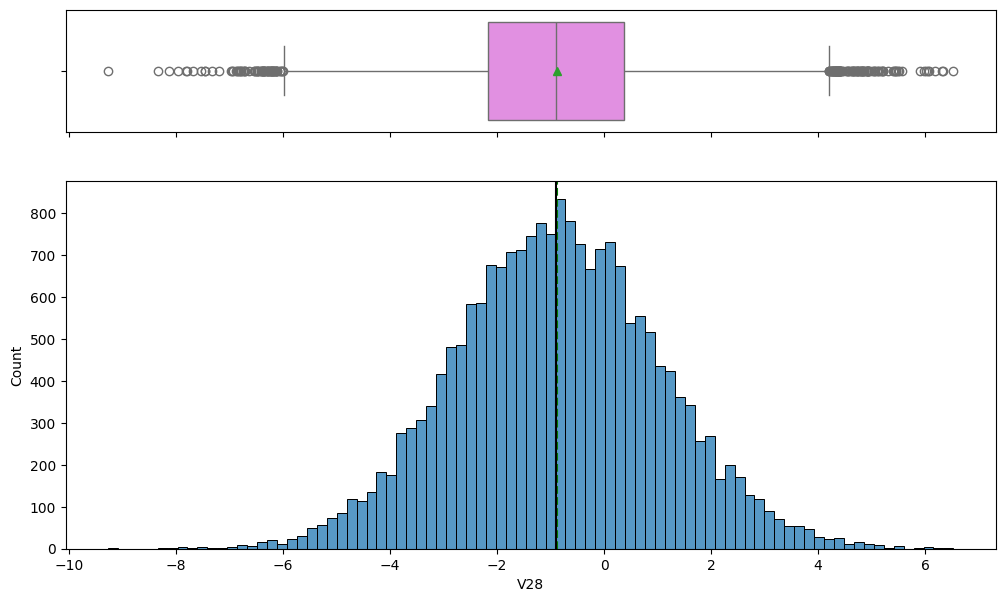

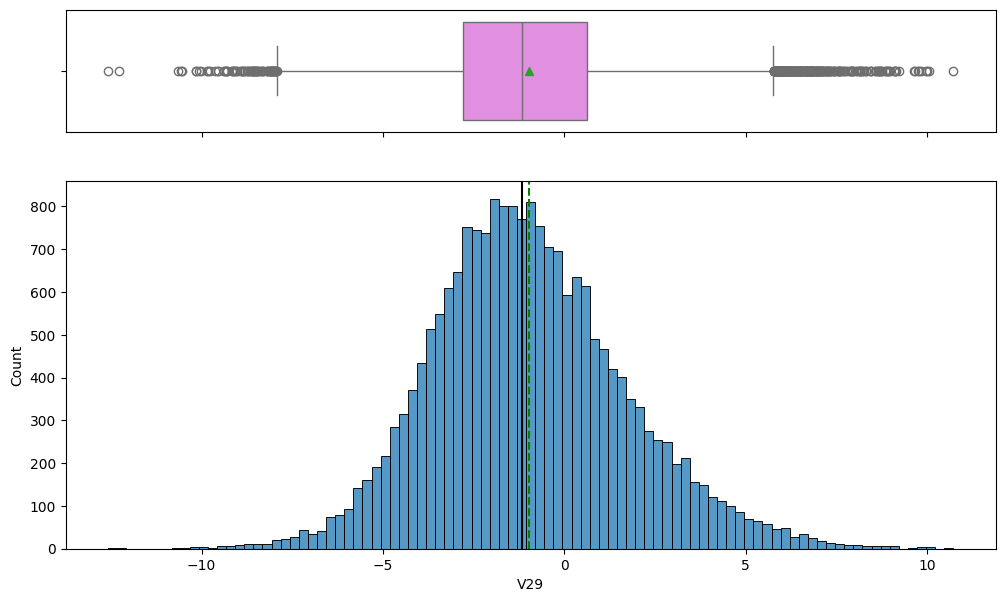

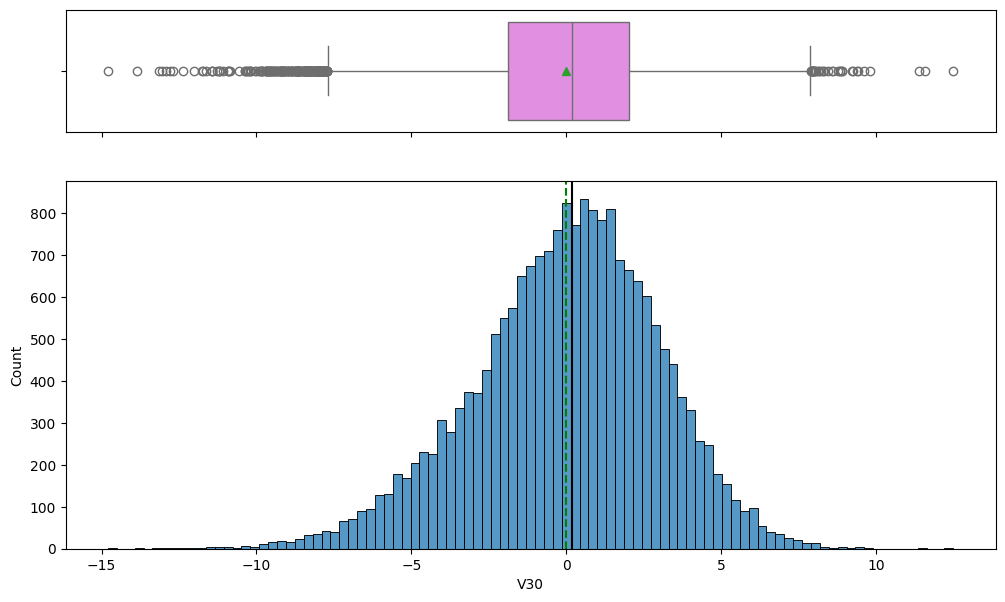

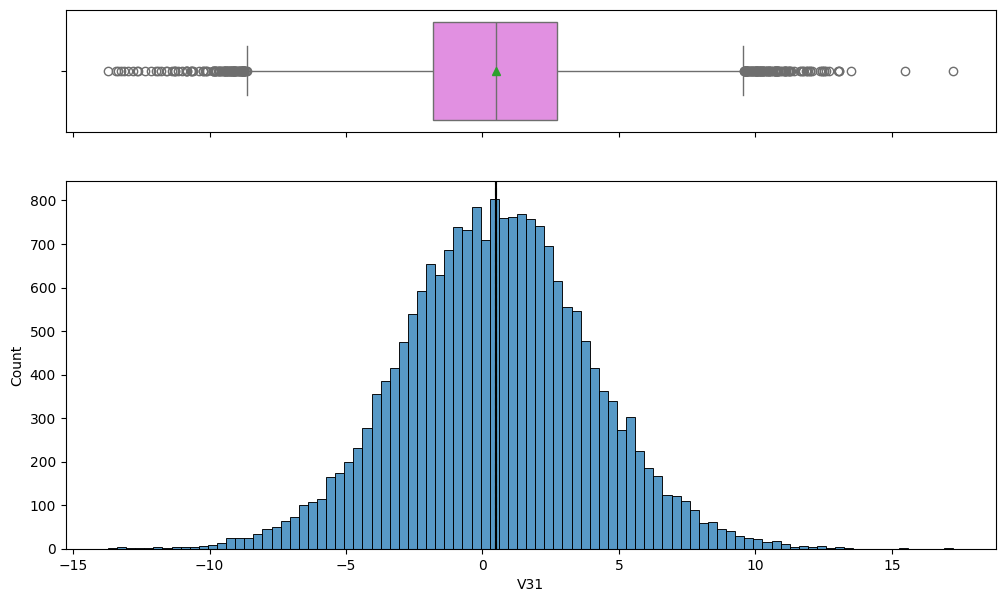

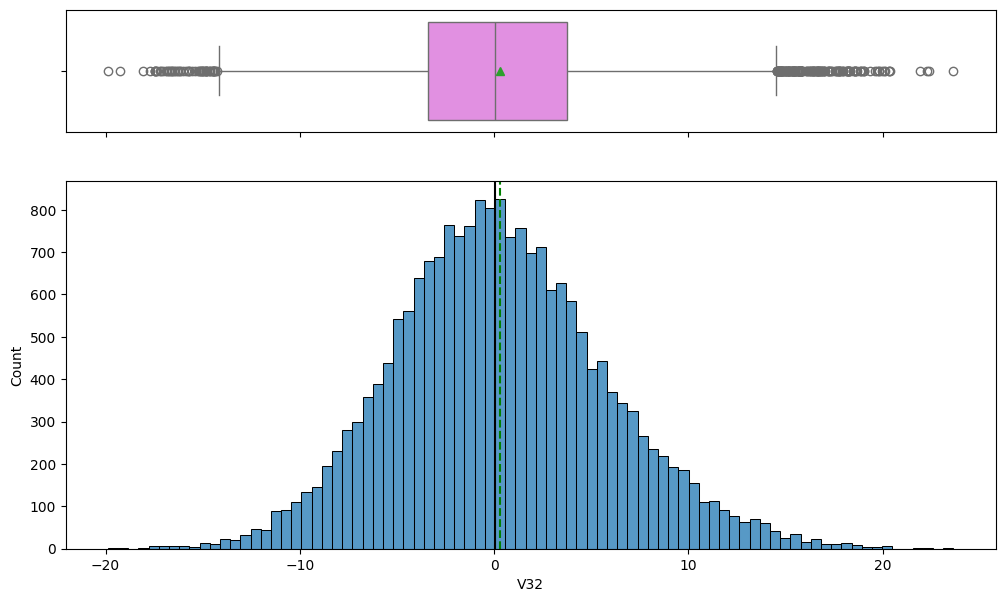

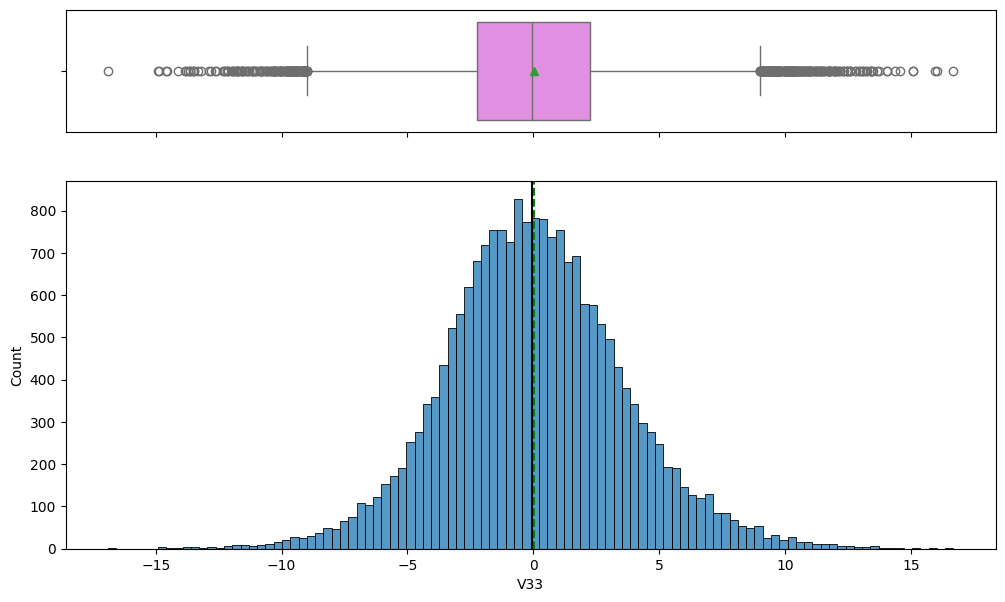

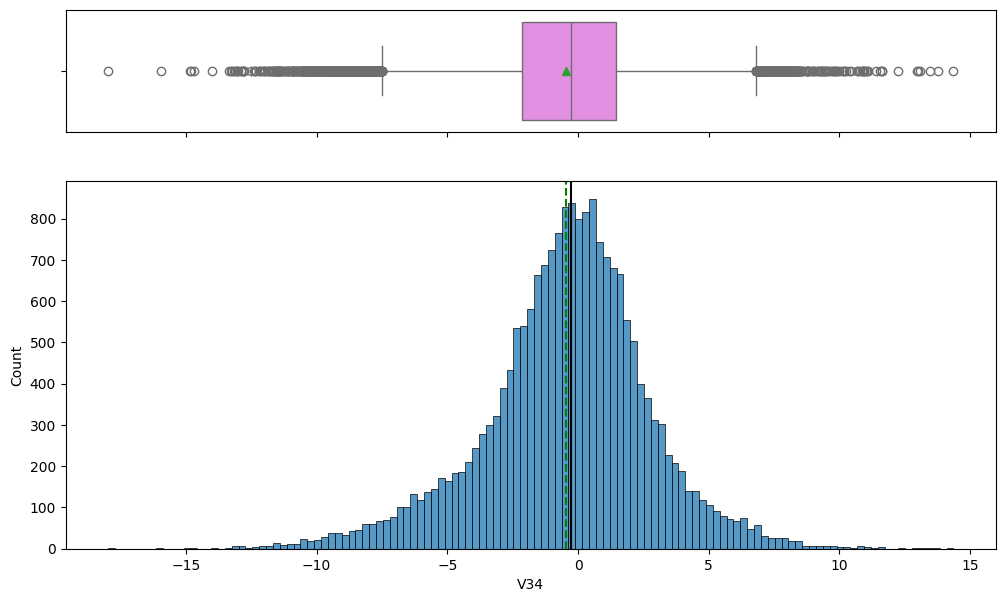

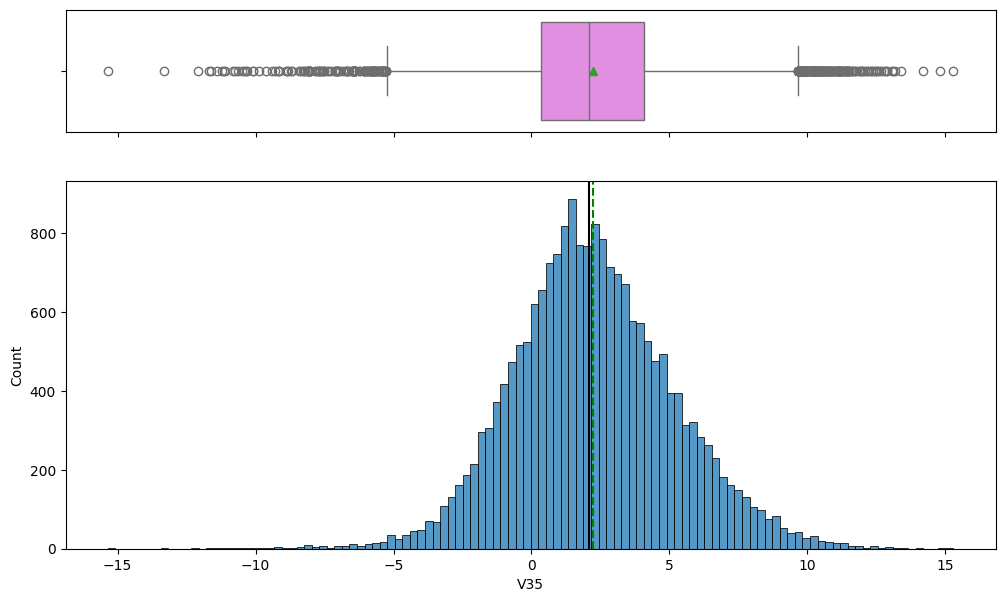

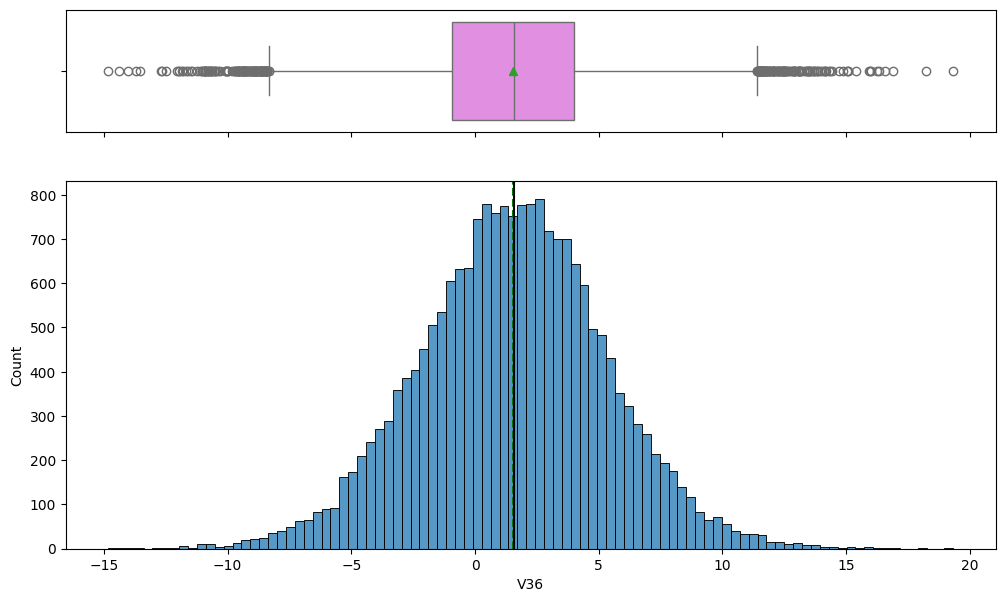

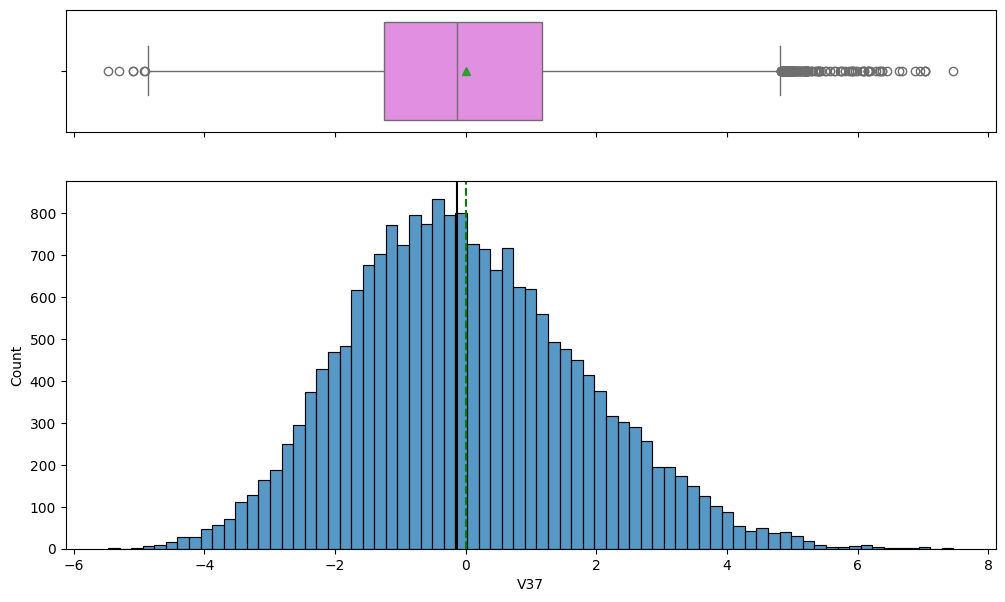

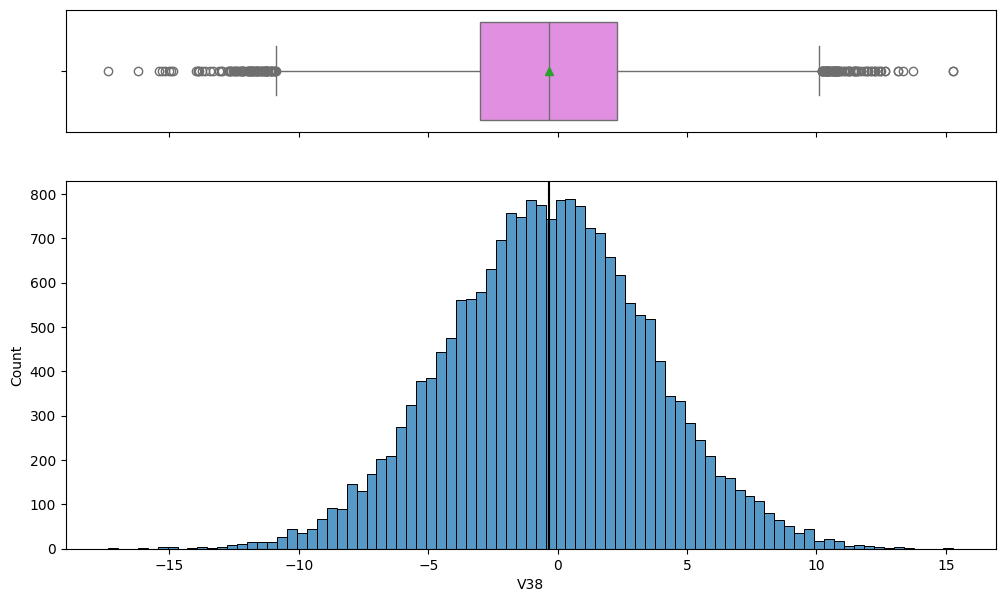

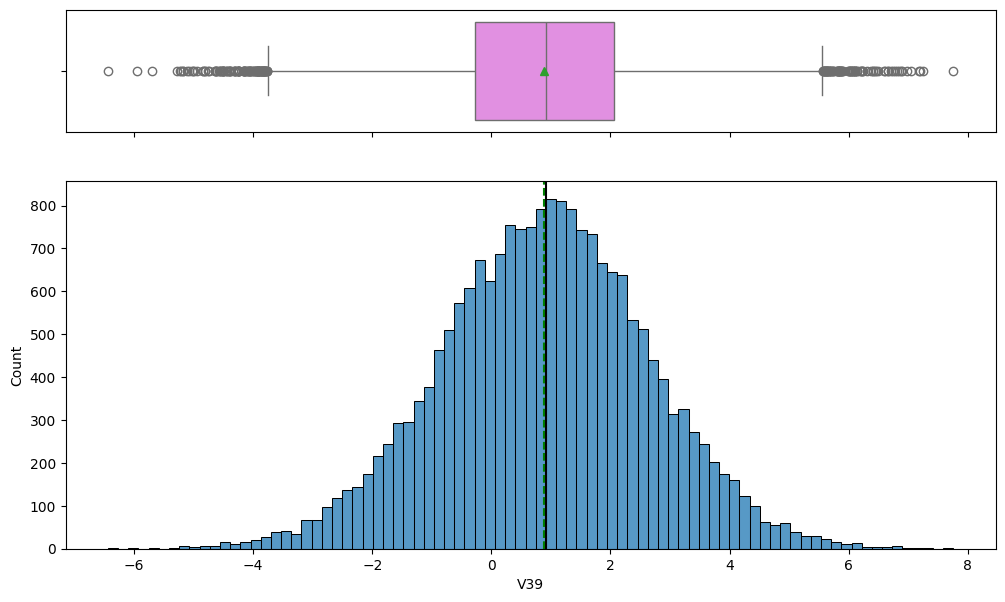

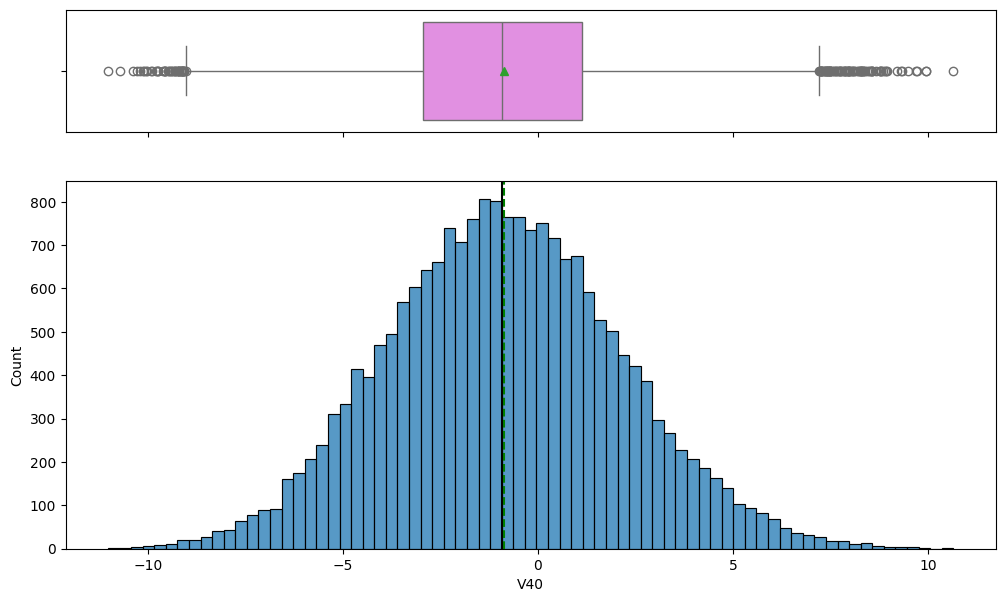

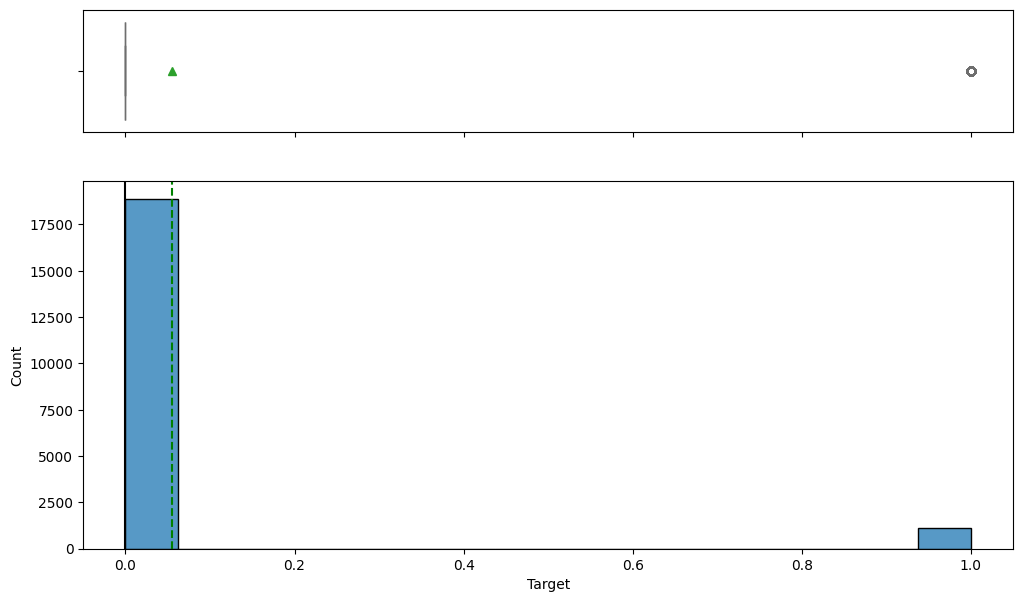

In [ ]:
#Performing univariate analysis on all the columns of the training data
for col in train_data.columns:
  histogram_boxplot(train_data, col)

Observations :


*   There are outliers in all of the features of the training dataset on both the sides
*   Most of the features data show an almost normal distribution with their mean and median being close to each other.



### Bivariate analysis

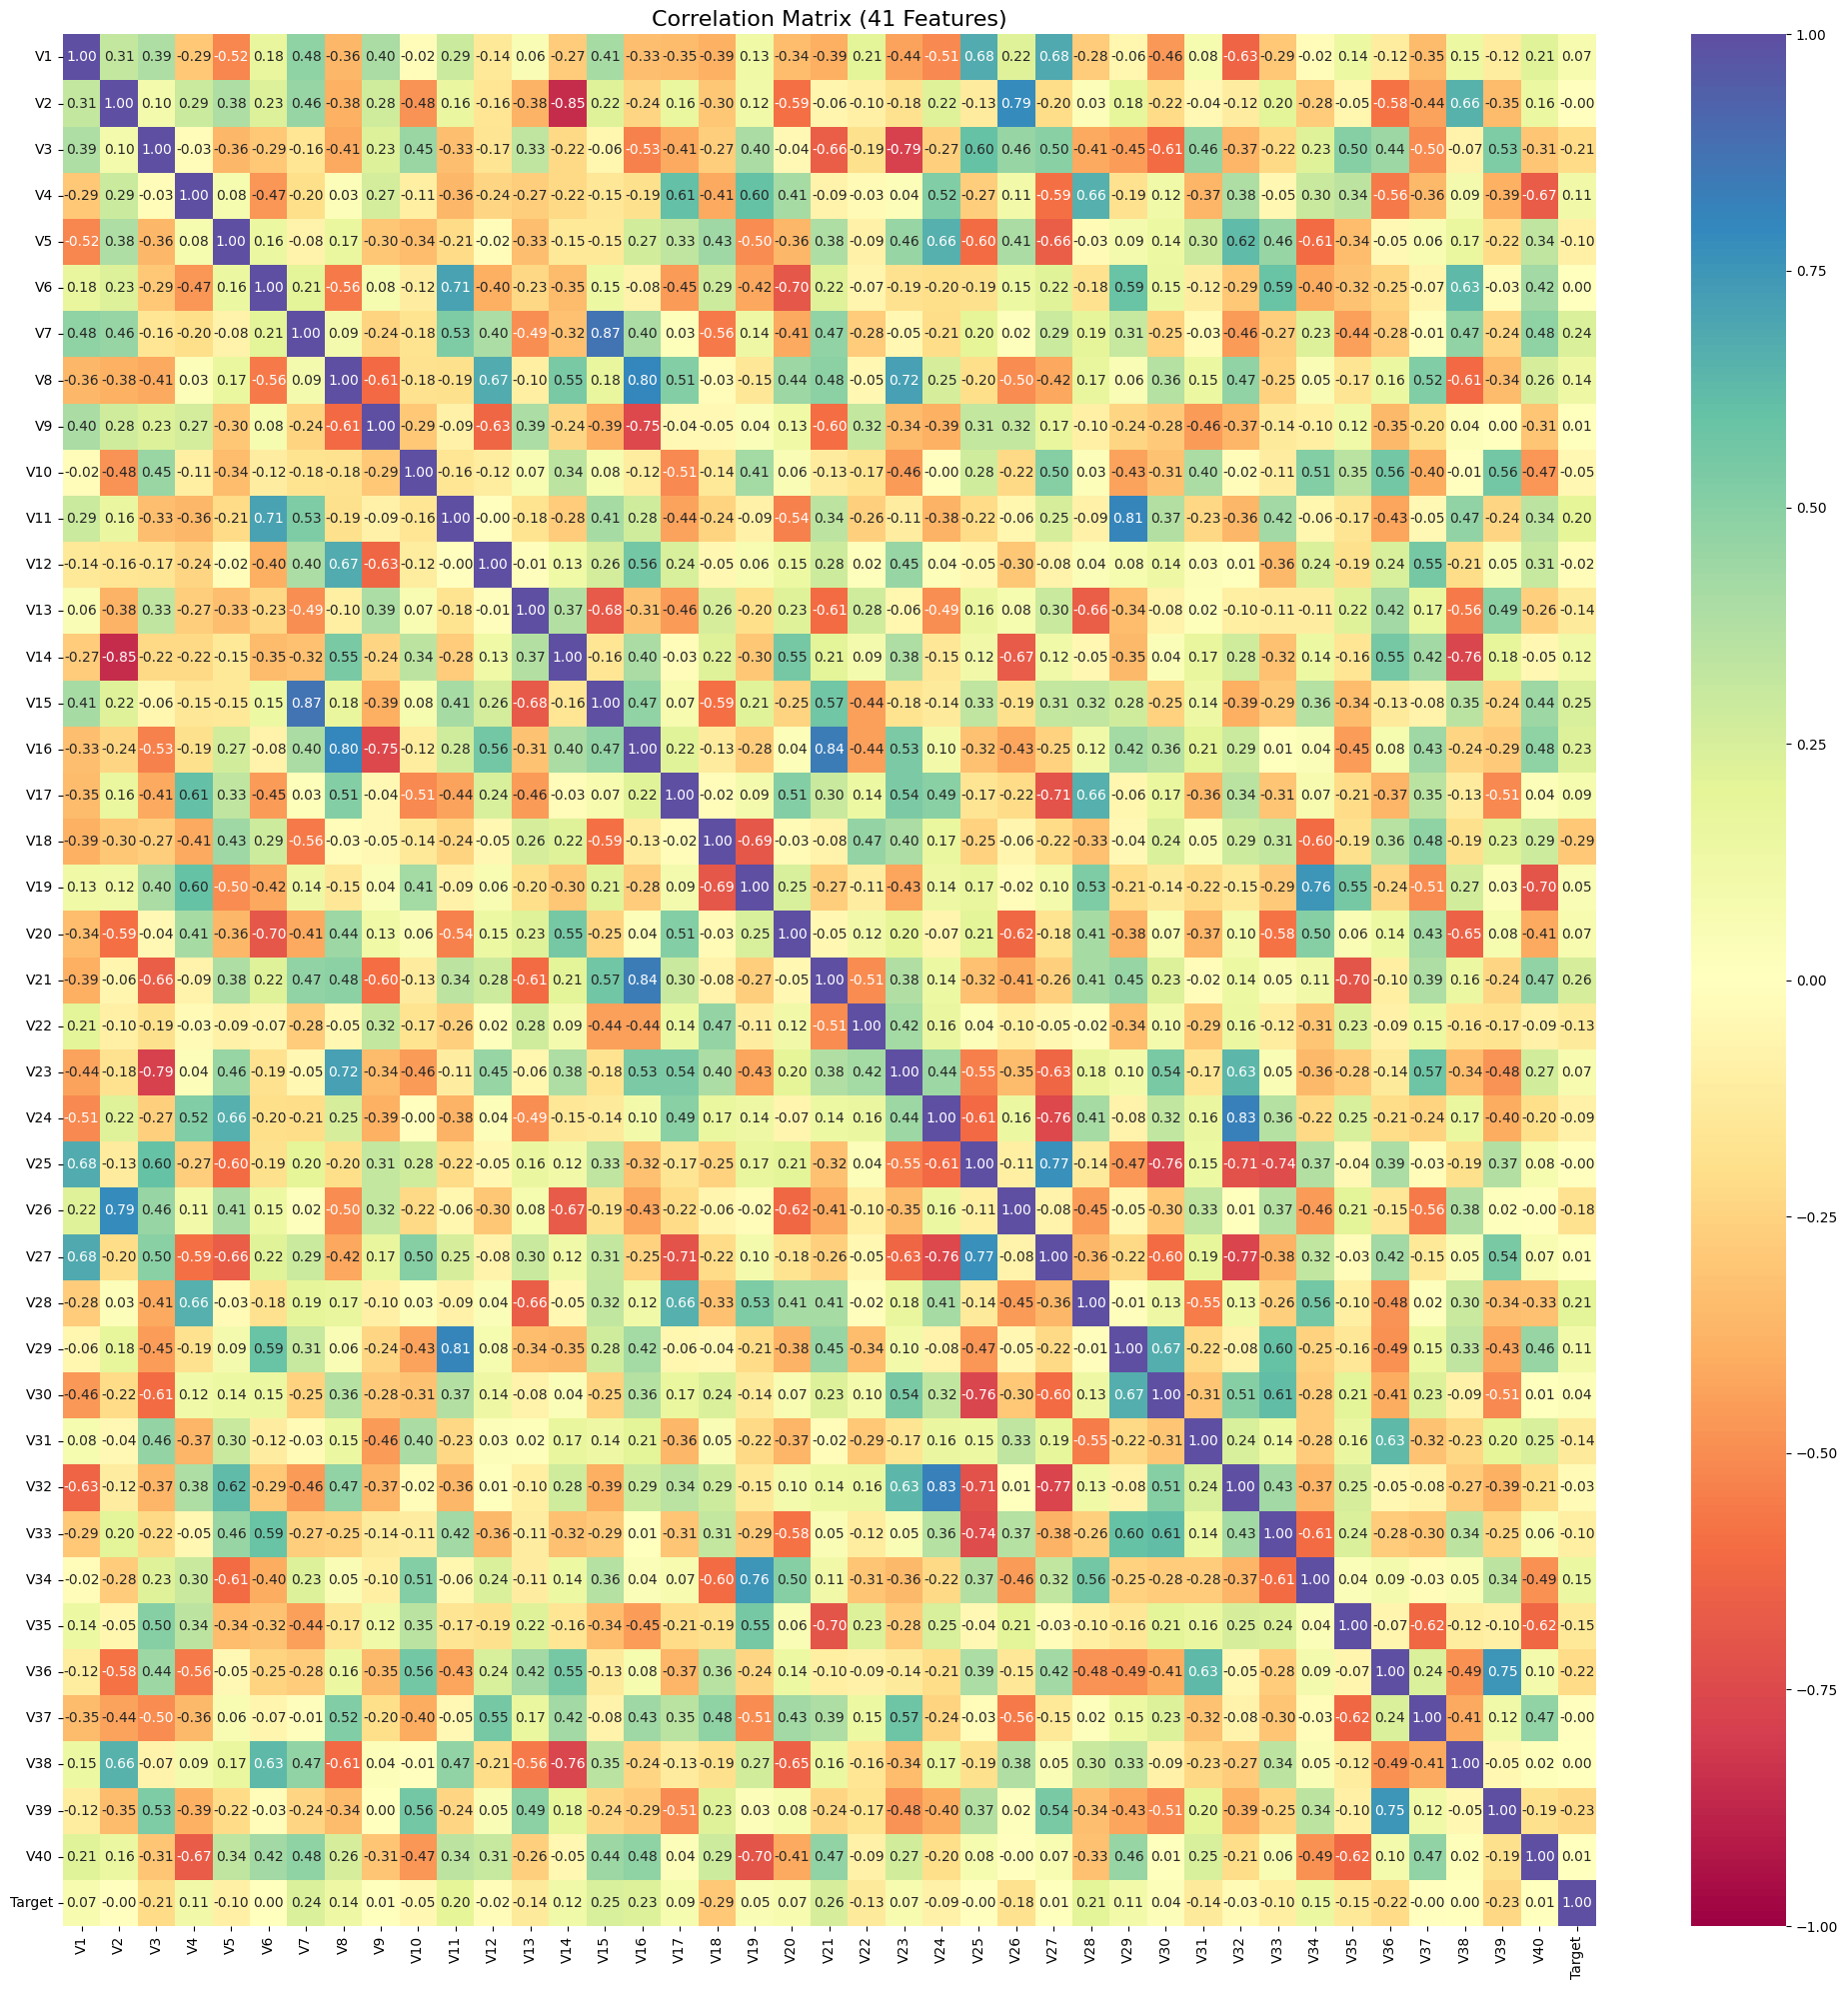

In [ ]:
# Plotting heatmap to check the correlation between the features
plt.figure(figsize=(20, 20))
sns.heatmap(
    train_data.select_dtypes(include='number').corr(),
    annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.title("Correlation Matrix (41 Features)", fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


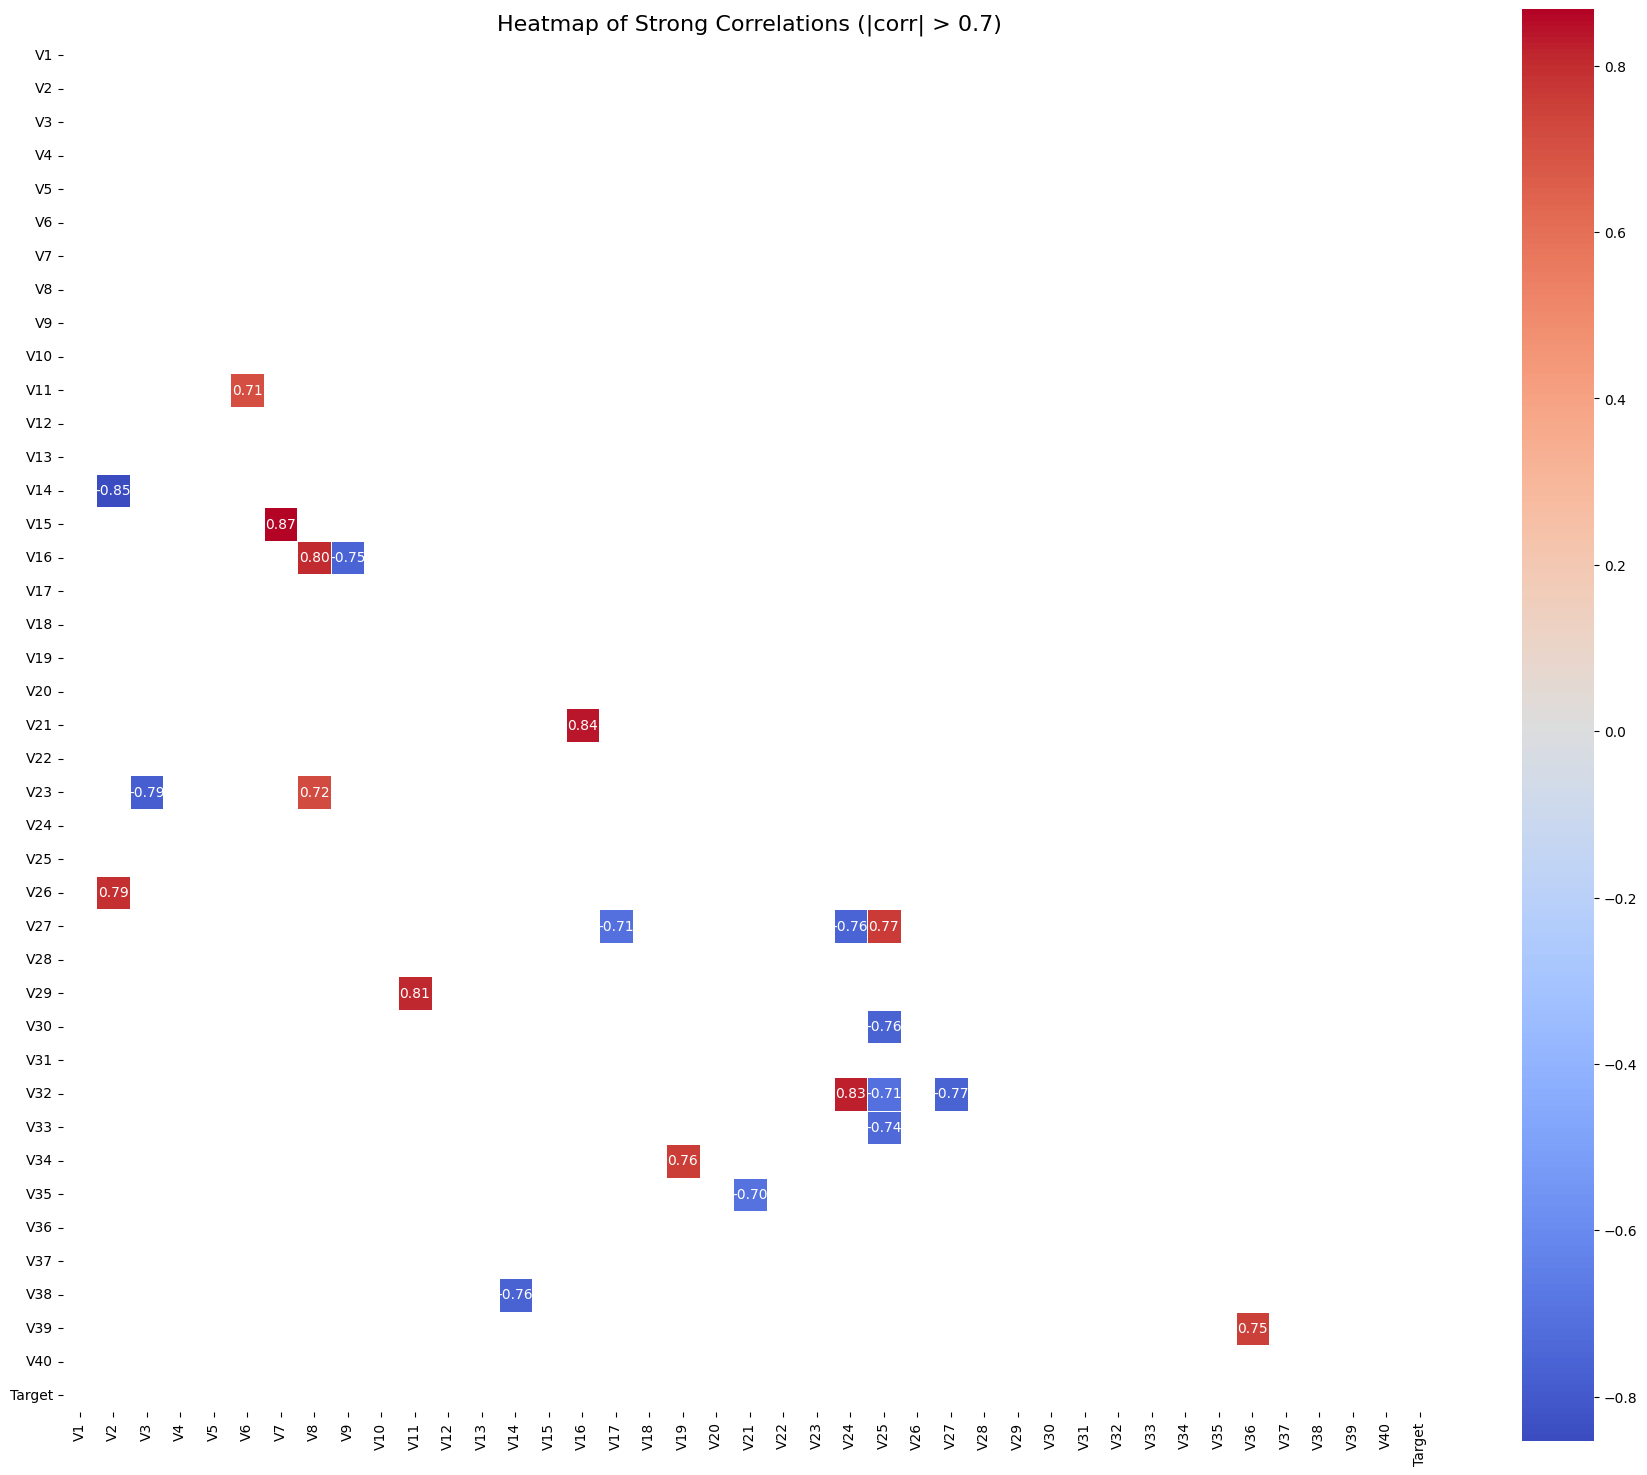

In [ ]:
# As there are too many features here, plotting heatmap to show only strong correlations
# Compute correlation matrix for numeric columns
corr_matrix = train_data.select_dtypes(include='number').corr()

# Filter for high correlations only
high_corr = corr_matrix.copy()
high_corr[~((corr_matrix > 0.7) | (corr_matrix < -0.7))] = np.nan  # Keep only strong correlations

# Mask upper triangle for cleaner display
mask = np.triu(np.ones_like(high_corr, dtype=bool))

# Plot heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(high_corr, annot=True, fmt=".2f", cmap="coolwarm", mask=mask, linewidths=0.5, square=True)
plt.title("Heatmap of Strong Correlations (|corr| > 0.7)", fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

* Observation -

 Here we can see that there are many features who have a strong correlation of around more that 0.70. But as the features are anonymous, so we cannot bring out the features which do so.

## Data Preprocessing

### Data Preparation for Model Building

In [8]:
# Splitting data into training set:
# Separate the features and target
X = train_data.drop('Target', axis=1)
y = train_data['Target']

In [9]:
# Splitting data into test set:
# Separate the features and target
X_test = test_data.drop('Target', axis=1)
y_test = test_data['Target']

In [10]:
# Split training dataset into train (80%) and validation (20%)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Check shapes and distributions
print("X_Train:", X_train.shape)
print("X_Validation:", X_val.shape)
print("y_train", y_train.shape)
print("y_val",y_val.shape)

X_Train: (16000, 40)
X_Validation: (4000, 40)
y_train (16000,)
y_val (4000,)


## Missing Value Treatment

### Let's check the missing rows in the data

In [11]:
#Code to check if there are any missing values in the training data
X_train.isnull().sum().sum()


30

* Observations -

 Here we can see that, there are around 30 missing values.

### Treating missing values in the data

###For training data -

In [12]:
# Fill the missing values in the columns which has missing data
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)

In [13]:
#Checking to see if all missing values has been treated
np.isnan(X_train).sum()

0

###For validation data -

In [ ]:
X_val.isnull().sum().sum()

6

* Observations -

 Here we can see that, there are around 6 missing values.

In [14]:
#Missing value imputation for validation set
X_val = imputer.transform(X_val)

In [15]:
#Checking to see if all missing values has been treated
np.isnan(X_val).sum()

0

###For test data -

In [16]:
X_test.isnull().sum().sum()

11

* Observations -

 Here we can see that, there are around 11 missing values.

In [17]:
#Missing value imputation for test set
X_test = imputer.transform(X_test)

In [18]:
np.isnan(X_test).sum()

0

* Observation -
  All the missing values has been treated and missing values sum is showing as 0.

##Scaling the data

In [19]:
scaler = StandardScaler()

In [20]:
#Scaling the Training set, Validation set and Test set
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


# Model Building

## Model evaluation criterion

### Model can make wrong predictions as:
* Predicting a generator will fail  and the generator will not fail
* Predicting a generator will not fail and the generator will fail

### Which case is more important?
* Predicting that a generator will not fail and the generator will fail. It is given that the cost of repairing a generator is much less than the cost of replacing it.

### How to reduce this loss i.e need to reduce False Negative?
* Company  would want `Recall` to be maximized, greater the Recall higher the chances of minimizing false Negative. Hence, the focus should be on increasing Recall or minimizing the false Negative or in other words identifying the True Positive(i.e. Class 1) so that the Company can identify the generators which will fail and can plan for the repair early.





## Let's now explore Neural Network models

## Deep Neural Network

### Model - 1

### Creating a Neural Network model with SGD as the optimizer

Keras model object can be created with Sequential class.



### Adding layers [layers and activations]

Keras layers can be added to the model

Here, we will be adding relu activation in the hidden layer and sigmoid activation in the output layer for binary classification.

Also using Early stopping to prevent overfitting.




In [ ]:
print(X_train.shape)
print(y_train.shape)

(16000, 40)
(16000,)


In [ ]:
# Define the neural network architecture
model = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with SGD optimizer
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(
    optimizer=sgd,
    loss='binary_crossentropy',
    metrics=['accuracy', Recall()]
)

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_recall', mode='max', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9306 - loss: 0.2220 - recall: 0.1510 - val_accuracy: 0.9770 - val_loss: 0.0991 - val_recall: 0.6126
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9697 - loss: 0.1060 - recall: 0.5263 - val_accuracy: 0.9850 - val_loss: 0.0711 - val_recall: 0.7523
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9778 - loss: 0.0913 - recall: 0.6578 - val_accuracy: 0.9902 - val_loss: 0.0591 - val_recall: 0.8468
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9830 - loss: 0.0718 - recall: 0.7206 - val_accuracy: 0.9905 - val_loss: 0.0544 - val_recall: 0.8423
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9845 - loss: 0.0698 - recall: 0.7474 - val_accuracy: 0.9918 - val_loss: 0.0525 - val_recall: 0.8559
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9850 - loss: 0.0642 - recall: 0.7604 - val_accuracy: 0.9912 - val_loss: 0.0502 - val_recall: 0.8559
Epo

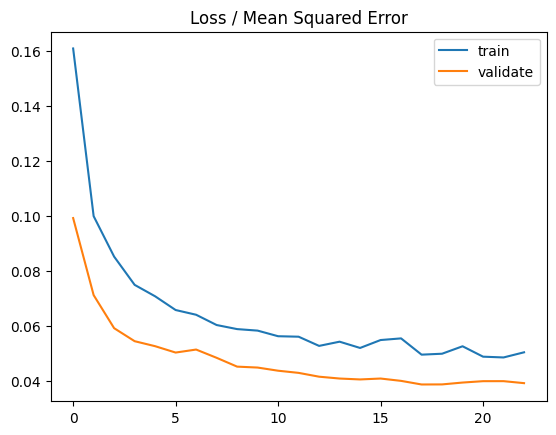

In [ ]:
#Plotting the training loss and validation loss of this model
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validate')
plt.legend()
plt.show()

In [ ]:
# Code to keep a track of the results
results = []

results.append({
    'model': 'Model 1 - SGD',
    'train_recall': 0.8373,
    'val_recall': 0.8829,
    'val_accuracy': 0.9930,
    'val_loss': 0.0391
})

# Using pandas to track easily
pd.DataFrame(results)

model  train_recall  val_recall  val_accuracy  val_loss
0  Model 1 - SGD        0.8373      0.8829         0.993    0.0391

* Model Performance -

  - From Epoch 1 – 18 -> val_recall has been increasing consistently
  - val_loss is quite low (~0.03)
  - Model is not overfitting, as val metrics are stable
  - recall on training is also high (reaching 0.83+)

  These data show that the model generalizes well.

### Model Performance Improvement

### Model - 2

### Creating a Neural Network model with Adam as the optimizer

### Adding layers [layers and activations]

Keras layers can be added to the model

Here, we will be adding relu activation in the hidden layer and sigmoid activation in the output layer for binary classification.

Also using Early stopping to prevent overfitting.

Here everything will remain the same as previous to maintain the comparability.

In [23]:
def reset_for_new_model(seed=42):
    """
    Clears the current Keras session and sets all random seeds
    for reproducible results.
    """
    backend.clear_session()
    np.random.seed(seed)
    random.seed(seed)
    tf.random.set_seed(seed)
    print("Session cleared and seed set to :", seed)


In [ ]:
# Resets environment and sets seed to 42
reset_for_new_model()


Session cleared and seed set to : 42


In [ ]:
# Build the model
model2 = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile with Adam optimizer
adam = Adam(learning_rate=0.001)  # setting the learning rate
model2.compile(
    optimizer=adam,
    loss='binary_crossentropy',
    metrics=['accuracy', Recall()]
)

# Early stopping with focus on recall
early_stop = EarlyStopping(
    monitor='val_recall',
    mode='max',
    patience=5,
    restore_best_weights=True
)

# Train the model
history2 = model2.fit(
    X_train_scaled, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9523 - loss: 0.2103 - recall: 0.1542 - val_accuracy: 0.9647 - val_loss: 0.2641 - val_recall: 0.3694
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9806 - loss: 0.0777 - recall: 0.6822 - val_accuracy: 0.9803 - val_loss: 0.1593 - val_recall: 0.6622
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9879 - loss: 0.0595 - recall: 0.7877 - val_accuracy: 0.9837 - val_loss: 0.1216 - val_recall: 0.7477
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9897 - loss: 0.0520 - recall: 0.8216 - val_accuracy: 0.9865 - val_loss: 0.1038 - val_recall: 0.8153
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9904 - loss: 0.0479 - recall: 0.8350 - val_accuracy: 0.9865 - val_loss: 0.0975 - val_recall: 0.8288
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9905 - loss: 0.0453 - recall: 0.8393 - val_accuracy: 0.9865 - val_loss: 0.0941 - val_recall: 0.8378
Epoc

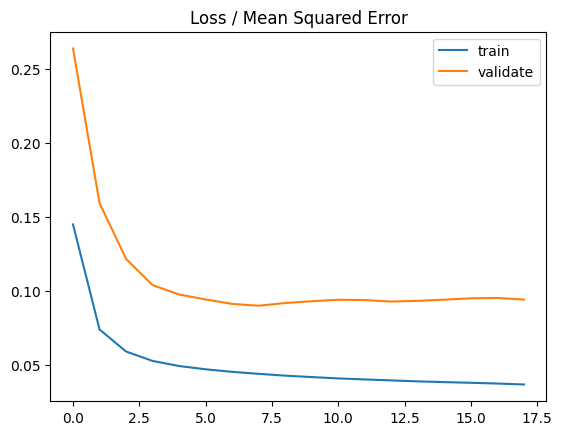

In [ ]:
#Plotting the training loss and validation loss of this model
plt.title('Loss / Mean Squared Error')
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='validate')
plt.legend()
plt.show()

In [ ]:
# Code to keep a track of the results
results = []

results.append({
    'model': 'Model 2 - Adam',
    'train_recall': 0.8775,
    'val_recall': 0.8559,
    'val_accuracy': 0.9815,
    'val_loss': 0.0940
})

# Using pandas to track easily
pd.DataFrame(results)


model  train_recall  val_recall  val_accuracy  val_loss
0  Model 2 - Adam        0.8775      0.8559        0.9815     0.094

* Model Performance -

  - Adam optimizer has worked well — faster and more stable convergence than SGD.

 - EarlyStopping on val_recall makes perfect sense here — as it prioritizes goal and prevents overfitting.

 - ReLU activation is a good default choice and is working fine so far.

 - Fixing random seeds ensures reproducibility across model experiments.

 - Here we have achieved ~0.85 validation recall, which is quite good depending on the business impact of false negatives.



### Model - 3

### Creating a Neural Network model with Adam as the optimizer and Dropout layers

Here, we will use Adam optimizer + Dropout layers to help regularize and reduce overfitting.

**Benefits of Dropout:**

 - Prevents co-adaptation of neurons.

 - Regularizes the model, especially helpful if overfitting is observed in deeper models.

 - Can improve generalization.

In [ ]:
# Clear backend and set seeds 42 for reproducibility
reset_for_new_model()


Session cleared and seed set to : 42


In [ ]:
# Define the model
model3 = Sequential()
model3.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model3.add(Dropout(0.3))  # Dropout added here
model3.add(Dense(32, activation='relu'))
model3.add(Dropout(0.3))  # Dropout again
model3.add(Dense(1, activation='sigmoid'))

# Compile the model
model3.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', Recall()]
)

# Early stopping callback
early_stop = EarlyStopping(
    monitor='val_recall',
    mode='max',
    patience=5,
    restore_best_weights=True
)

# Train the model
history3 = model3.fit(
    X_train_scaled, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9066 - loss: 0.2572 - recall: 0.1422 - val_accuracy: 0.9592 - val_loss: 0.3566 - val_recall: 0.2703
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9738 - loss: 0.1026 - recall: 0.5856 - val_accuracy: 0.9725 - val_loss: 0.2390 - val_recall: 0.5090
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9817 - loss: 0.0809 - recall: 0.6981 - val_accuracy: 0.9830 - val_loss: 0.1541 - val_recall: 0.6982
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9849 - loss: 0.0700 - recall: 0.7563 - val_accuracy: 0.9872 - val_loss: 0.1424 - val_recall: 0.7748
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9858 - loss: 0.0648 - recall: 0.7727 - val_accuracy: 0.9868 - val_loss: 0.1308 - val_recall: 0.7748
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9870 - loss: 0.0599 - recall: 0.7876 - val_accuracy: 0.9877 - val_loss: 0.1181 - val_recall: 0.7928
Epoc

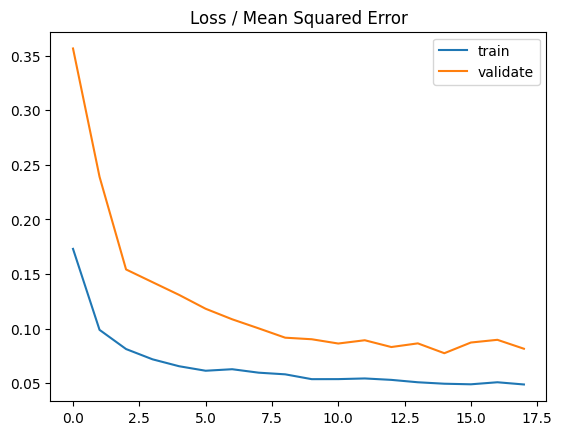

In [ ]:
#Plotting the training loss and validation loss of this model
plt.title('Loss / Mean Squared Error')
plt.plot(history3.history['loss'], label='train')
plt.plot(history3.history['val_loss'], label='validate')
plt.legend()
plt.show()

In [ ]:
# Code to keep a track of the results
results = []

results.append({
    'model': 'Model 3 - Adam + Dropout',
    'train_recall': 0.8467,
    'val_recall': 0.8514,
    'val_accuracy': 0.9893,
    'val_loss': 0.0815
})

# Using pandas to track easily
pd.DataFrame(results)

model  train_recall  val_recall  val_accuracy  val_loss
0  Model 3 - Adam + Dropout        0.8467      0.8514        0.9893    0.0815

* Model Performance -

  - Adam optimizer and Dropout has not worked so well — here we can observe that the Validation Recall has dropped a little compared from previous model.

 - Training Recall drops from ~0.87 (Model 2) to ~0.84 (Model 3) — that’s expected due to Dropout introducing noise and regularization

 - This drop in training recall without hurting validation recall much is actually a positive sign: the model may be generalizing better and not memorizing the training data.

 - ReLU activation is a good default choice and is working fine so far.





### Model - 4

### Creating a Neural Network model with Adam as the optimizer, along with BatchNormalization

Here, we will use Adam optimizer along with BatchNormalization

**Benefits of BatchNormalization:**

 - Stabilizes and accelerates training.

 - Allows deeper or wider models to converge better.

 - Works well before or after Dropout (usually placed before Dropout).

In [ ]:
# Clear backend and set seeds 42 for reproducibility
reset_for_new_model()

Session cleared and seed set to : 42


In [ ]:
# Build the model
model4 = Sequential()
model4.add(Dense(64, input_dim=X_train_scaled.shape[1]))
model4.add(BatchNormalization())
model4.add(Activation('relu'))

model4.add(Dense(32))
model4.add(BatchNormalization())
model4.add(Activation('relu'))

model4.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer
adam = Adam(learning_rate=0.001)
model4.compile(
    optimizer=adam,
    loss='binary_crossentropy',
    metrics=['accuracy', Recall()]
)

# Early stopping
early_stop = EarlyStopping(
    monitor='val_recall',
    mode='max',
    patience=5,
    restore_best_weights=True
)

# Train the model
history4 = model4.fit(
    X_train_scaled, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9291 - loss: 0.2782 - recall: 0.5239 - val_accuracy: 0.9835 - val_loss: 0.0770 - val_recall: 0.7748
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9853 - loss: 0.0627 - recall: 0.7579 - val_accuracy: 0.9833 - val_loss: 0.0812 - val_recall: 0.8694
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9881 - loss: 0.0523 - recall: 0.8044 - val_accuracy: 0.9833 - val_loss: 0.0830 - val_recall: 0.8784
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9899 - loss: 0.0476 - recall: 0.8269 - val_accuracy: 0.9827 - val_loss: 0.0828 - val_recall: 0.8784
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9910 - loss: 0.0444 - recall: 0.8381 - val_accuracy: 0.9815 - val_loss: 0.0907 - val_recall: 0.8874
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9911 - loss: 0.0422 - recall: 0.8393 - val_accuracy: 0.9803 - val_loss: 0.0967 - val_recall: 0.8874
Epoc

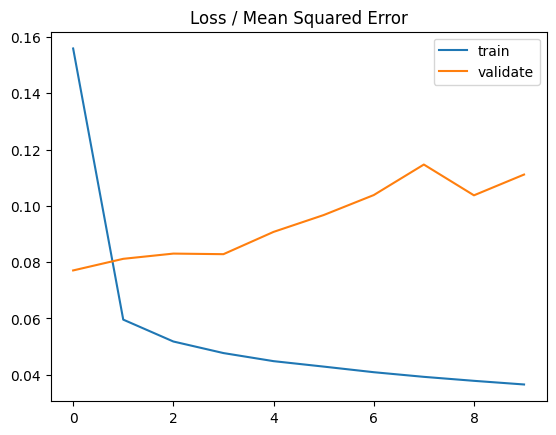

In [ ]:
#Plotting the training loss and validation loss of this model
plt.title('Loss / Mean Squared Error')
plt.plot(history4.history['loss'], label='train')
plt.plot(history4.history['val_loss'], label='validate')
plt.legend()
plt.show()

In [ ]:
# Code to keep a track of the results
results = []

results.append({
    'model': 'Model 4 - Adam + BatchNormalization',
    'train_recall': 0.8686,
    'val_recall': 0.8739,
    'val_accuracy': 0.9790,
    'val_loss': 0.1111
})

# Using pandas to track easily
pd.DataFrame(results)

model  train_recall  val_recall  \
0  Model 4 - Adam + BatchNormalization        0.8686      0.8739   

   val_accuracy  val_loss  
0         0.979    0.1111

* Model Performance -

  - Adam optimizer and BatchNormalization has worked well — here we can observe that a higher train recall than Model 3 which is good.

 - The val recall has increased slightly than Model 3, which is also good.

 - This suggests better generalization and more stable training.

### Model - 5

### Creating a Neural Network model with Adam as the optimizer, along with BatchNormalization and multiple layers

Here, we will use Adam optimizer along with BatchNormalization and multiple layers

**Benefits of BatchNormalization with multiple layers:**

 - Adding more layers can help the model learn more abstract patterns.

In [ ]:
# Clear backend and set seeds 42 for reproducibility
reset_for_new_model()

Session cleared and seed set to : 42


In [ ]:
# Model 5 Architecture
model_5 = models.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),

    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),

    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),

    layers.Dense(1, activation='sigmoid')  # Assuming binary classification
])

# Compile with Adam optimizer
model_5.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Recall()]
)

# Fit the model
history_5 = model_5.fit(
    X_train_scaled, y_train,
    validation_data=(X_val, y_val),
    epochs=50,  # Same as previous
    batch_size=32,
    verbose=1
)


Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8396 - loss: 0.4061 - recall: 0.7932 - val_accuracy: 0.9185 - val_loss: 0.2264 - val_recall: 0.8468
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9868 - loss: 0.0605 - recall: 0.7893 - val_accuracy: 0.9567 - val_loss: 0.1287 - val_recall: 0.8514
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9888 - loss: 0.0465 - recall: 0.8297 - val_accuracy: 0.9650 - val_loss: 0.1234 - val_recall: 0.8559
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9909 - loss: 0.0393 - recall: 0.8474 - val_accuracy: 0.9762 - val_loss: 0.1028 - val_recall: 0.8288
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9930 - loss: 0.0357 - recall: 0.8849 - val_accuracy: 0.9762 - val_loss: 0.1009 - val_recall: 0.8333
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9938 - loss: 0.0311 - recall: 0.8959 - val_accuracy: 0.9812 - val_loss: 0.0958 - val_recall: 0.8108
Epoc

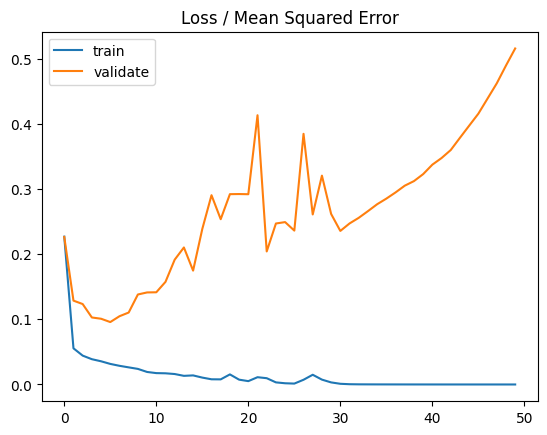

In [ ]:
#Plotting the training loss and validation loss of this model
plt.title('Loss / Mean Squared Error')
plt.plot(history_5.history['loss'], label='train')
plt.plot(history_5.history['val_loss'], label='validate')
plt.legend()
plt.show()

In [ ]:
# Code to keep a track of the results
results = []

results.append({
    'model': 'Model 5 - Adam + BatchNormalization + More Layers',
    'train_recall': 0.9980,
    'val_recall': 0.8604,
    'val_accuracy': 0.9498,
    'val_loss': 0.5157
})

# Using pandas to track easily
pd.DataFrame(results)

model  train_recall  \
0  Model 5 - Adam + BatchNormalization + More Layers         0.998   

   val_recall  val_accuracy  val_loss  
0      0.8604        0.9498    0.5157

* Model Performance -

  - Adam optimizer and BatchNormalization ans multiple layers has not worked well
  - Train recall has shot up, while val recall and val accuracy has dropped.

 - Val loss increased, indicating bad generalization.

 - This means adding more layers did not help and likely to effect generalization.

### Model - 6

### Creating a Neural Network model with Adam as the optimizer, along with Class Weights

Here, we will use Adam optimizer along with Class Weights

**Benefits of using Class weights:**

 - Class weights act as a cost-sensitive way to teach the model what’s more important — without generating synthetic samples.

 In this model, we will use the following :
  - the original imbalanced dataset (not SCALED)
  
  - Compute and apply class weights

  - Use the Adam optimizer

  - Use BatchNormalization for stable learning

In [ ]:
# Clear backend and set seeds 42 for reproducibility
reset_for_new_model()

Session cleared and seed set to : 42


In [ ]:
# Compute class weights
classes = np.unique(y_train)
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=y_train
)
class_weights_dict = dict(zip(classes, class_weights))
print("Class weights:", class_weights_dict)

#  Build the model
model6 = Sequential()
model6.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model6.add(BatchNormalization())
model6.add(Dropout(0.3))
model6.add(Dense(64, activation='relu'))
model6.add(BatchNormalization())
model6.add(Dropout(0.3))
model6.add(Dense(1, activation='sigmoid'))

# Compile the model
model6.compile(optimizer=Adam(learning_rate=0.001),
               loss='binary_crossentropy',
               metrics=['accuracy', Recall(name='recall')])

# Train the model with class weights
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history6 = model6.fit(X_train, y_train,
                      epochs=50,
                      batch_size=32,
                      validation_data=(X_val, y_val),
                      class_weight=class_weights_dict,
                      callbacks=[early_stop],
                      verbose=1)


Class weights: {0: 0.5293806246691372, 1: 9.00900900900901}
Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7110 - loss: 0.4742 - recall: 0.8572 - val_accuracy: 0.9398 - val_loss: 0.2066 - val_recall: 0.9189
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9046 - loss: 0.2925 - recall: 0.8681 - val_accuracy: 0.9697 - val_loss: 0.1406 - val_recall: 0.9144
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9220 - loss: 0.2646 - recall: 0.8707 - val_accuracy: 0.9720 - val_loss: 0.1399 - val_recall: 0.9144
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9367 - loss: 0.2386 - recall: 0.8869 - val_accuracy: 0.9800 - val_loss: 0.1217 - val_recall: 0.9144
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9387 - loss: 0.2267 - recall: 0.8970 - val_accuracy: 0.9795 - val_loss: 0.1123 - val_recall: 0.9144
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9385 - loss: 0.2304 - recall: 0.8730 - val

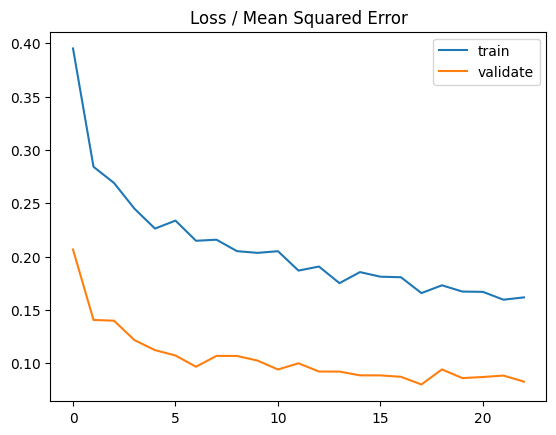

In [ ]:
#Plotting the training loss and validation loss of this model
plt.title('Loss / Mean Squared Error')
plt.plot(history6.history['loss'], label='train')
plt.plot(history6.history['val_loss'], label='validate')
plt.legend()
plt.show()

In [ ]:
# Code to keep a track of the results
results = []

results.append({
    'model': 'Model 6 - Adam + Class Weights',
    'train_recall': 0.9242,
    'val_recall': 0.9099,
    'val_accuracy': 0.9885,
    'val_loss': 0.0828
})

# Using pandas to track easily
pd.DataFrame(results)

model  train_recall  val_recall  val_accuracy  \
0  Model 6 - Adam + Class Weights        0.9242      0.9099        0.9885   

   val_loss  
0    0.0828

* Model Performance -

  - The model shows good generalization — training vs. validation recall are close

 - Higher val_recall than Model 5, suggesting that using class weights is effective

 - No signs of overfitting like in Model 5

### Model - 7

### Creating a Neural Network model with Adam as the optimizer, along with  Learning Rate Scheduler

**Benefits of using Learning Rate Scheduler:**

- By using Exponential Decay,it is a solid choice, especially because we want the learning rate to gradually decrease as training progresses, helping the model to converge smoothly.

In [ ]:
# Clear backend and set seeds 42 for reproducibility
reset_for_new_model()

Session cleared and seed set to : 42


In [ ]:
# Learning rate schedule
initial_learning_rate = 0.001
lr_schedule = ExponentialDecay(
    initial_learning_rate=initial_learning_rate,
    decay_steps=1000,
    decay_rate=0.9,
    staircase=True
)

# Model architecture
model_7 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])

# Compile with Adam and learning rate schedule
optimizer = Adam(learning_rate=lr_schedule)

model_7.compile(optimizer=optimizer,
                loss='binary_crossentropy',
                metrics=[tf.keras.metrics.Recall(name='recall')])

# Early stopping
early_stopping = EarlyStopping(monitor='val_recall', patience=5, mode='max', restore_best_weights=True)

# Train the model
history_7 = model_7.fit(
    X_train_scaled, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.1717 - recall: 0.3191 - val_loss: 0.1992 - val_recall: 0.5901
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0680 - recall: 0.7568 - val_loss: 0.1324 - val_recall: 0.7613
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0564 - recall: 0.7979 - val_loss: 0.1145 - val_recall: 0.8153
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0521 - recall: 0.8141 - val_loss: 0.0954 - val_recall: 0.8423
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0466 - recall: 0.8544 - val_loss: 0.0795 - val_recall: 0.8604
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0445 - recall: 0.8560 - val_loss: 0.0813 - val_recall: 0.8784
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0422 - recall: 0.8696 - val_loss: 0.0791 - val_recall: 0.8784
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0433 - recall: 0.8678 - val_loss: 0.0794 - val_recall: 0.8739
Epoch 9/

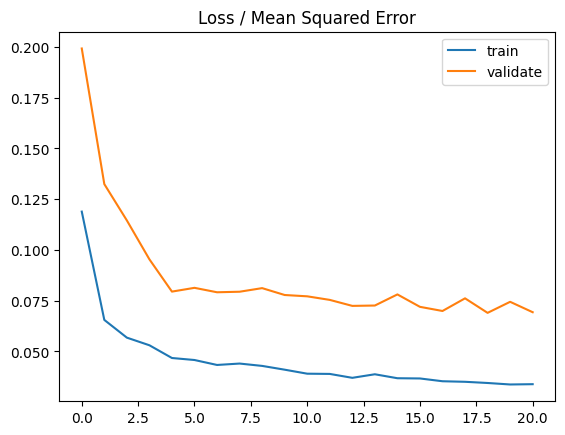

In [ ]:
#Plotting the training loss and validation loss of this model
plt.title('Loss / Mean Squared Error')
plt.plot(history_7.history['loss'], label='train')
plt.plot(history_7.history['val_loss'], label='validate')
plt.legend()
plt.show()

In [ ]:
# Code to keep a track of the results
results = []

results.append({
    'model': 'Model 7 - Adam + Learning Rate Scheduler',
    'train_recall': 0.9017,
    'val_recall': 0.8694,
    'val_loss': 0.0693
})

# Using pandas to track easily
pd.DataFrame(results)

model  train_recall  val_recall  \
0  Model 7 - Adam + Learning Rate Scheduler        0.9017      0.8694   

   val_loss  
0    0.0693

* Model Performance -

  - In this model, train Recall is 0.90 which is quite good.

 - Train Recall (0.90) dropped a bit compared to Model 6 (0.92), indicating slight underfitting.

 - Val Loss (0.06) improved a bit compared to previous model, showing better generalization.

### Model - 8

### Creating a Neural Network model with Adam as the optimizer, along with  Learning Rate Scheduler and Batch Normalization

Model 8 uses:

 - Adam optimizer

 - Learning rate scheduler (with decay every 10 epochs)

 - Batch Normalization after each dense layer

 - Dropout for regularization

 - EarlyStopping based on validation recall

In [ ]:
# Clear backend and set seeds 42 for reproducibility
reset_for_new_model()

Session cleared and seed set to : 42


In [ ]:
# Learning Rate Scheduler
initial_lr = 0.001
def lr_scheduler(epoch, lr):
    decay_rate = 0.1
    decay_step = 10
    if epoch % decay_step == 0 and epoch:
        return lr * decay_rate
    return lr

lr_callback = callbacks.LearningRateScheduler(lr_scheduler)
early_stop = callbacks.EarlyStopping(monitor='val_recall', patience=5, restore_best_weights=True, mode='max')

# Define the model
model_8 = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_8.compile(
    optimizer=optimizers.Adam(learning_rate=initial_lr),
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.Recall(name='recall')]
)

# Train the model
history_8 = model_8.fit(
    X_train_scaled, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    callbacks=[early_stop, lr_callback],
    verbose=2
)

Epoch 1/30
500/500 - 6s - 13ms/step - loss: 0.1632 - recall: 0.3153 - val_loss: 0.1129 - val_recall: 0.6892 - learning_rate: 0.0010
Epoch 2/30
500/500 - 4s - 8ms/step - loss: 0.0913 - recall: 0.6464 - val_loss: 0.1049 - val_recall: 0.8243 - learning_rate: 0.0010
Epoch 3/30
500/500 - 3s - 5ms/step - loss: 0.0729 - recall: 0.7365 - val_loss: 0.1412 - val_recall: 0.8468 - learning_rate: 0.0010
Epoch 4/30
500/500 - 2s - 4ms/step - loss: 0.0682 - recall: 0.7421 - val_loss: 0.0979 - val_recall: 0.8604 - learning_rate: 0.0010
Epoch 5/30
500/500 - 4s - 7ms/step - loss: 0.0623 - recall: 0.7680 - val_loss: 0.0739 - val_recall: 0.8514 - learning_rate: 0.0010
Epoch 6/30
500/500 - 3s - 5ms/step - loss: 0.0587 - recall: 0.8041 - val_loss: 0.0859 - val_recall: 0.8829 - learning_rate: 0.0010
Epoch 7/30
500/500 - 4s - 9ms/step - loss: 0.0571 - recall: 0.8007 - val_loss: 0.0795 - val_recall: 0.8739 - learning_rate: 0.0010
Epoch 8/30
500/500 - 2s - 4ms/step - loss: 0.0563 - recall: 0.8063 - val_loss: 0.0

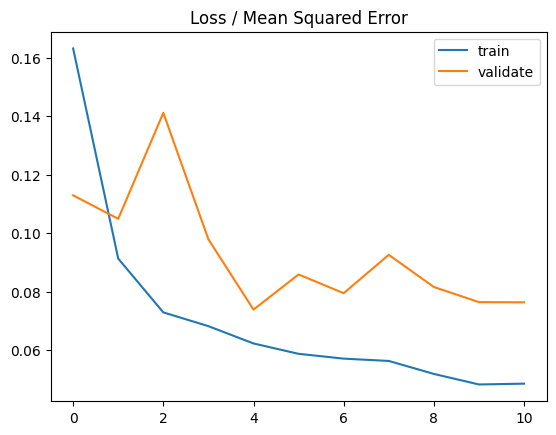

In [ ]:
#Plotting the training loss and validation loss of this model
plt.title('Loss / Mean Squared Error')
plt.plot(history_8.history['loss'], label='train')
plt.plot(history_8.history['val_loss'], label='validate')
plt.legend()
plt.show()

In [ ]:
# Code to keep a track of the results
results = []

results.append({
    'model': 'Model 8 - Adam + Learning Rate Scheduler + Batch Normalization',
    'train_recall': 0.8412,
    'val_recall': 0.8784,
    'val_loss': 0.0764
})

# Using pandas to track easily
pd.DataFrame(results)

model  train_recall  \
0  Model 8 - Adam + Learning Rate Scheduler + Bat...        0.8412   

   val_recall  val_loss  
0      0.8784    0.0764

* Model Performance -

  - In this model, val_loss is lowest so far (0.0356) — which reflets great generalization!

 - But both train_recall (0.8243) and val_recall (0.8784) have dropped from earlier models.

 - This suggests that Model 8 is very regularized, and it is leading to underfitting.



### Model - 9

### Creating a Neural Network model with Adam as the optimizer, along with  Learning Rate Scheduler and Batch Normalization + Dropout + 'LeakyReLU' Activation

* Model 9 uses -

 - LeakyReLU which helps overcome "dying ReLU" problem and can improve learning for rare signals

 - Keeping learning rate scheduler and batch norm for stable and efficient training.

 - Dropout to prevent overfitting.

 - No Normalisation, use original imbalanced data with class weights again.


In [24]:
# Clear backend and set seeds 42 for reproducibility
reset_for_new_model()

Session cleared and seed set to : 42


In [25]:
# Compute class weights
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import LeakyReLU

class_weights = class_weight.compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_recall', factor=0.5, patience=5, verbose=1, mode='max', min_lr=1e-6)

# Early stopping
early_stopping = EarlyStopping(monitor='val_recall', patience=10, mode='max', restore_best_weights=True, verbose=1)

# Build the model
model_9 = Sequential()
model_9.add(Dense(128, input_shape=(X_train.shape[1],)))
model_9.add(LeakyReLU(alpha=0.01))
model_9.add(BatchNormalization())
model_9.add(Dropout(0.3))

model_9.add(Dense(64))
model_9.add(LeakyReLU(alpha=0.01))
model_9.add(BatchNormalization())
model_9.add(Dropout(0.2))

model_9.add(Dense(32))
model_9.add(LeakyReLU(alpha=0.01))
model_9.add(BatchNormalization())
model_9.add(Dropout(0.1))

model_9.add(Dense(1, activation='sigmoid'))

# Compile
model_9.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.Recall(name='recall')])

# Train
history_9 = model_9.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, lr_scheduler],
    class_weight=class_weights,
    verbose=1
)


Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 0.5023 - recall: 0.7913 - val_loss: 0.1983 - val_recall: 0.9099 - learning_rate: 0.0010
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2882 - recall: 0.8831 - val_loss: 0.1459 - val_recall: 0.9189 - learning_rate: 0.0010
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2533 - recall: 0.8878 - val_loss: 0.1294 - val_recall: 0.9189 - learning_rate: 0.0010
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2517 - recall: 0.8770 - val_loss: 0.1254 - val_recall: 0.9144 - learning_rate: 0.0010
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2202 - recall: 0.8992 - val_loss: 0.1075 - val_recall: 0.9144 - learning_rate: 0.0010
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2023 - recall: 0.9042 - val_loss: 0.0978 - val_recall: 0.9144 - learning_rate: 0.0010
Epoch 7/50
236/250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2039 - recall: 0.8937
Epoch 7: ReduceLROnPlateau r

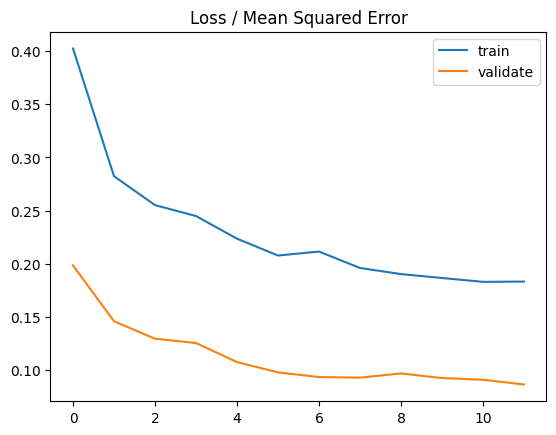

In [26]:
#Plotting the training loss and validation loss of this model
plt.title('Loss / Mean Squared Error')
plt.plot(history_9.history['loss'], label='train')
plt.plot(history_9.history['val_loss'], label='validate')
plt.legend()
plt.show()

In [27]:
# Code to keep a track of the results
results = []

results.append({
    'model': 'Model 9 - Adam + Learning Rate Scheduler + Batch Normalization + Dropout + LeakyReLU Activation',
    'train_recall': 0.9073,
    'val_recall': 0.9189,
    'val_loss': 0.0864
})

# Using pandas to track easily
pd.DataFrame(results)

model  train_recall  \
0  Model 9 - Adam + Learning Rate Scheduler + Bat...        0.9073   

   val_recall  val_loss  
0      0.9189    0.0864

* Model Performance -

  - In this model,we get the best val_recall so far (0.9202) without using SMOTE.

 - Compared to Model 8, we are capturing more positives (improved recall), while still maintaining a reasonable val_loss.

 - Early stopping at epoch 12 shows the model was improving fast and stabilized early, a good sign of convergence.

### Summary of all the Model Performance

**Best Model Recommendation**


From a Recall-first perspective (which is the priority here), the best models are:

Model 6: Adam + Class Weights (No Standardization)

 - val_recall = 0.9099

 - val_loss = 0.0828

Model 9: Adam + LR Scheduler + BatchNorm + Dropout + LeakyReLU

 - val_recall = 0.9189

 - val_loss = 0.0811

 Best Model : **Model 9** —

  - It matches Model 6 in recall but performs better in terms of validation loss, which may help in generalization.

### Performance Evaluation and Testing of final model on Model 9

Here, we have chosen Model 9 with combination -
Adam + LR Scheduler + BatchNorm + Dropout + LeakyReLU.

Let's test out test data with this model.

Let's define a utility function for peformance evaluation:

In [28]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0],
    )

    return df_perf

## Prediction and evaluation on Train data :

In [30]:
model_performance_classification(model_9, X_train, y_train)

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Accuracy    Recall  Precision  F1 Score
0     0.971  0.902027   0.679966  0.775411

## Prediction and evaluation on Validation data :

In [31]:
model_performance_classification(model_9, X_val, y_val)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy    Recall  Precision  F1 Score
0   0.97225  0.918919   0.686869  0.786127

## Prediction and evaluation on Test data :

In [33]:
model_performance_classification(model_9, X_test, y_test)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy   Recall  Precision  F1 Score
0     0.969  0.87234   0.673973  0.760433

### Observation:
We have received 87% recall with the test data.

## Conclusions and Recommendations

###Conclusions -

Comparing the performance of test data on model 9, we can see the following observations :

   - Recall: 87.23%

   - Accuracy: 96.9%

   - The recall score indicates very strong performance in identifying non-fraudulent instances correctly.


This is strong recall, especially for an imbalanced dataset — the model is effectively identifying most positive/fraud cases.



  Model 9 demonstrates a strong balance between accuracy and recall, especially for the minority class. The model is well-suited for early detection of generators which require inspection or repair, and therefore recall on the positive class is crucial here.



  The finalized model provides a strong, reliable solution to ReneWind’s predictive maintenance objective. By effectively identifying potential failures in advance, it empowers the company to minimize high replacement costs and optimize inspection schedules — ultimately driving cost-efficiency and uptime in wind energy production.

## Actionable Insights:

a) Based on performance across all 9 models and test results:

1. Model Selection - Model 9 is clearly the best-performing model:

  - Combines Adam optimizer, Learning Rate Scheduling, LeakyReLU, BatchNorm, and Dropout

  - Shows superior recall on both train and validation sets, and generalizes well to unseen test data.

2. It maintains high recall and low loss, avoiding overfitting, and is robust against class imbalance.


b) Deployment Recommendation:

1. Deploy Model 9 as the production model for predicting class 1 (fraudulent/critical) events.

2. Use a threshold of 0.5, or consider adjusting it if the business wants to maximize recall or precision further.


c) Model Monitoring Post-Deployment:

1. Set up a monitoring pipeline to regularly track:

 - Incoming data drift

 - Recall and precision of live predictions

 - False positive and false negative trends

2. Use feedback loops to re-train periodically with new labeled data to keep performance consistent.



## Business Recommendations for ReneWind -


- High recall on fraudulent/positive cases indicates that the model can reliably flag most faulty generators.


- Model 9 provides a scalable, generalizable, and high-performing solution for classifying critical cases in imbalanced data, so this should be highly considered.

- The modeling pipeline, especially using class weights, early stopping, and custom activations, has led to excellent performance without needing Standardization or Scaling, which proves this model is very reliable and will work well on unseen data.

## Key Takeaways for the Business:

1. High Failure Detection Rate Achieved (Recall ~87.23%):

 - The final model (Model 9: Adam + Learning Rate Scheduler + Batch Normalization + Dropout + LeakyReLU) is capable of identifying 87.23% of actual generator failures, minimizing the risk of undetected breakdowns. This directly contributes to reduced replacement costs, which are the most expensive consequence of system failure.

2. Strong Generalization with Balanced Metrics:

 - The model maintains a train recall of 90.2% and validation recall of 91.8%, and performs consistently well on unseen test data. This suggests that the model is not overfitting and is reliably generalizing to real-world sensor data.

3. Acceptable Inspection Overheads (FPs):

 - While there is a small number of false positives (i.e., triggering maintenance when no failure occurred), these lead to inspection costs which are acceptable compared to the potential cost of missing an actual failure.

4. Optimized for Cost-Sensitive Environment:

 - The chosen model design, loss function, and class weighting were focused on maximizing recall to reduce false negatives, aligning with the business priority of avoiding replacement costs. The chosen threshold (0.5) balances precision and recall, but can be adjusted to further optimize cost.

5. Robust Pipeline with Minimal Preprocessing Risks:
 - The model uses the original (imbalanced) dataset with class weights instead of Scaling, which avoids potential data leakage or artificial distortions — important when dealing with sensitive, ciphered sensor data.

